# Nociones sobre contrastes de hipótesis

El tema más común en la inferencia estadística es la prueba de hipótesis. Si bien la prueba de hipótesis se popularizó a principios del siglo XX, el primer uso se remonta a John Arbuthnot en el siglo XVIII. John rastreó los registros de nacimiento de 80 años en Londres y concluyó que cada año nacían más hombres que mujeres. Después de eso, la prueba de significación moderna es la herencia de inteligencia de Karl Pearson, quien inventó la prueba $\chi^2$ de Pearson, William Gosset, el padre de la distribución $t$ de Student, y Ronald Fisher, quien inició la hipótesis nula y la prueba de significancia.

Una prueba de hipótesis es una forma de evaluar alguna evidencia contra la declaración predeterminada sobre una población. Nos referimos a la declaración por defecto como la **hipótesis nula** ($H_0$), que tratamos de rechazar utilizando los datos observados. Aquí, usamos como punto de partida para las pruebas de significación estadística. La **hipótesis alternativa** ($H_1$) es una afirmación contraria a la hipótesis nula. Una hipótesis nula a menudo se establece en forma declarativa que postula una relación entre variables. Debe reflejar el resumen lo más explícito posible y ser comprobable por la teoría estadística.

Imagina que eres químico. Después de pasar miles de horas en el laboratorio, desarrolla un nuevo medicamento que puede mejorar drásticamente la capacidad de entender las matemáticas. Para mostrar su poder mágico, debes probarlo. Naturalmente, es posible que necesite algunos voluntarios para tomar el medicamento y ver si puede ayudarlos a aprender mejor las matemáticas. ¿Cómo empiezas?

* Primero, necesitará dos grupos de voluntarios cuidadosamente seleccionados al azar, de modo que no haya diferencia entre su capacidad de comprensión matemática medida por algunas métricas. Los dos grupos se conocen comúnmente como el grupo de prueba y el grupo de control. El grupo de prueba (o grupo de tratamiento ) es un grupo de personas que experimentarán el medicamento, mientras que el grupo de control representa el grupo de usuarios que se reservan como punto de referencia, es decir, configuraciones ambientales idénticas excepto que toman este medicamento. De esta forma se minimiza la influencia de todas las variables, excepto el impacto de la variable independiente en el tratamiento.

* En segundo lugar, después de un período de tomar el medicamento, deberá medir la comprensión matemática de los dos grupos con las mismas métricas, como dejar que los voluntarios realicen las mismas pruebas después de aprender una nueva fórmula matemática. Luego, puede recopilar su rendimiento y comparar los resultados. En este caso, nuestra hipótesis nula será que no hay diferencia entre los dos grupos, y nuestra alternativa será que sí la hay.

Esto todavía no es completamente formal. Hay muchos detalles en los que tienes que pensar cuidadosamente. Por ejemplo, ¿cuál es la métrica adecuada para evaluar su capacidad de comprensión matemática? ¿Cuántos voluntarios para su prueba para que pueda estar seguro de afirmar la eficacia de su medicamento? ¿Cuánto tiempo debe ejecutar la prueba? ¿Cómo decides si hay una diferencia entre los dos grupos? ¿Le importa solo el rendimiento promedio o también el rango de variación de las puntuaciones?

De esta manera, la prueba de hipótesis proporciona un marco para el diseño experimental y el razonamiento sobre la certeza de los resultados observados. Si ahora podemos demostrar que es muy poco probable que la hipótesis nula sea cierta, podemos rechazarla con confianza.

Para completar la historia de cómo trabajar con la prueba de hipótesis, ahora necesitamos introducir terminología adicional y hacer que algunos de nuestros conceptos anteriores sean formales.

## Significancia estadística

Siguiendo con el ejemplo anterior, después de comparar los resultados, observamos una diferencia en las puntuaciones medias entre el grupo de control y el de tratamiento. Pero, ¿cómo de grande debe ser esa diferencia para que podamos afirmar con seguridad que no se debe al mero azar? ¿Es una diferencia de 2 puntos suficiente? ¿Y una de 10? Aquí es donde entra en juego el concepto de **significancia estadística**, que nos proporciona un marco riguroso para tomar esta decisión.

La significación estadística mide la probabilidad de rechazar erróneamente la hipótesis nula, $H_0$, cuando no debe ser rechazado, es decir,

$$ \text{statistical significance}=1-\alpha=1-P(\text{Reject }H_0|\,H_0\text{ is true}) $$

También se conoce como error tipo I o falso positivo. Por otra parte, $\alpha$ se denomina nivel de significación y su valor comúnmente utilizado es $5\%$, es decir, $1-\alpha=95\%$. El nivel de significación se puede explicar como el nivel de riesgo que estamos dispuestos a asumir cuando rechazamos una hipótesis nula verdadera.

El siguiente gráfico representa el escenario de nuestro experimento farmacéutico.

*   **La curva azul (izquierda)**: representa la **distribución de la hipótesis nula ($H_0$)**. Esta es la distribución de las puntuaciones medias que esperaríamos obtener si el medicamento *no tuviera ningún efecto*. Su centro (media) está en cero, lo que significa que, en promedio, no hay diferencia entre el grupo de tratamiento y el de control.
*   **La curva naranja (derecha)**: representa la **distribución de la hipótesis alternativa ($H_1$)**. Muestra las puntuaciones medias que podríamos esperar si el medicamento *sí tuviera un efecto* (en este caso, un efecto positivo).

Puedes usar los deslizadores para cambiar los siguientes parámetros y observar cómo afecta a las distribuciones y a nuestra decisión:

1.  **`significancia_alpha` ($\alpha$)**: Este es el **nivel de significancia**. Representa la probabilidad de cometer un **Error de Tipo I**: rechazar la hipótesis nula cuando en realidad es verdadera (es decir, concluir que el fármaco funciona cuando no es así). Observa cómo al mover este deslizador, las **zonas rojas de rechazo** se hacen más grandes o más pequeñas. Un valor de `0.05` (5%) es el estándar en muchas disciplinas.
2.  **`diferencia_de_medias`**: Este parámetro controla la **diferencia esperada** en las puntuaciones entre el grupo que toma el medicamento y el que no. En otras palabras, es una medida del **tamaño del efecto** del fármaco. ¿Qué ocurre cuando el efecto del medicamento es muy grande (la curva naranja se aleja mucho de la azul)? ¿Y si es muy pequeño?
3.  **`numero_de_muestras`**: Simula el número de voluntarios en nuestro estudio. A medida que aumentas el número de muestras, observa cómo las curvas se vuelven más "estrechas" y "puntiagudas". Esto refleja que, con más datos, tenemos más certeza sobre el verdadero efecto promedio.

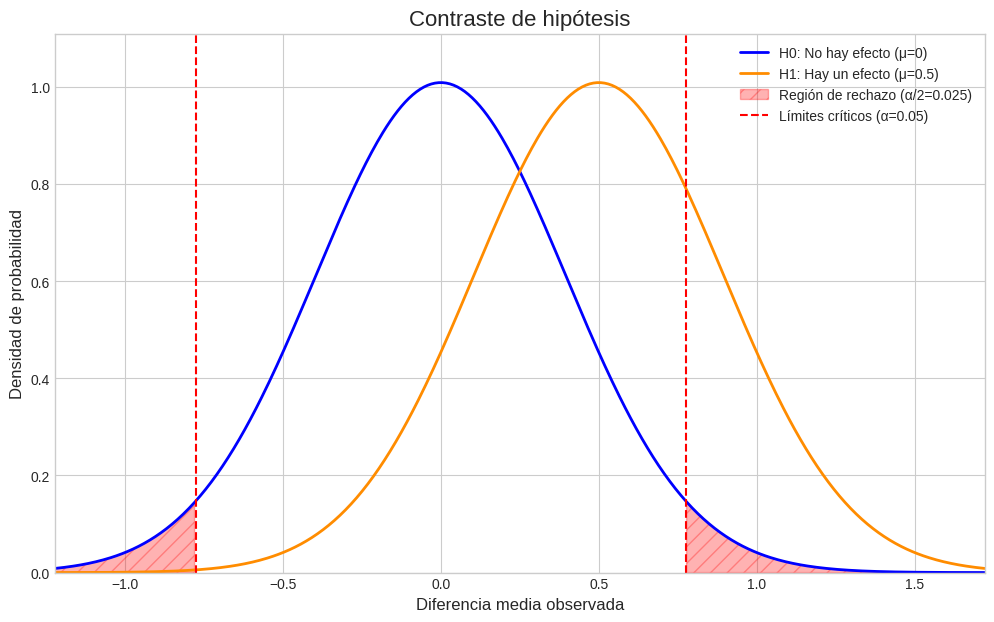

In [56]:
#@title Visualización del contraste de hipótesis
#@markdown Juega con los parámetros para ver cómo afectan a las distribuciones y las zonas de rechazo.

significancia_alpha = 0.05 #@param {type:"slider", min:0.01, max:0.20, step:0.01}
diferencia_de_medias = 0.5 #@param {type:"slider", min:0, max:5, step:0.1}
numero_de_muestras = 40 #@param {type:"slider", min:10, max:1000, step:10}
desviacion_estandar = 2.5 #@param {type:"slider", min:1, max:10, step:0.5}

show_power_area = True #@param {type:"boolean"}
show_beta_area = True #@param {type:"boolean"}

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Configuración del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Parámetros
media_nula = 0
media_alternativa = diferencia_de_medias
error_estandar = desviacion_estandar / np.sqrt(numero_de_muestras)

# Distribuciones
dist_nula = stats.norm(loc=media_nula, scale=error_estandar)
dist_alternativa = stats.norm(loc=media_alternativa, scale=error_estandar)

# Rango para el eje X
# Aseguramos un rango que cubra ambas distribuciones
min_x = min(dist_nula.ppf(0.001), dist_alternativa.ppf(0.001))
max_x = max(dist_nula.ppf(0.999), dist_alternativa.ppf(0.999))
x_values = np.linspace(min_x, max_x, 500)

# Graficar las distribuciones
ax.plot(x_values, dist_nula.pdf(x_values), label=f'H0: No hay efecto (μ={media_nula})', color='blue', lw=2)
ax.plot(x_values, dist_alternativa.pdf(x_values), label=f'H1: Hay un efecto (μ={diferencia_de_medias:.1f})', color='darkorange', lw=2)

# --- Cálculo de valores críticos para un test de DOS colas (lo más común) ---
valor_critico_izq = dist_nula.ppf(significancia_alpha / 2)
valor_critico_der = dist_nula.ppf(1 - significancia_alpha / 2)

# --- REGIONES IMPORTANTES ---

# 1. Región de Rechazo (Error Tipo I / Alpha): Bajo H0, más allá de los críticos
# Esta es la región donde decimos "hay un efecto"
x_alpha_izq = x_values[x_values <= valor_critico_izq]
ax.fill_between(x_alpha_izq, 0, dist_nula.pdf(x_alpha_izq), color='red', alpha=0.3, hatch='//',
                label=f'Región de rechazo (α/2={significancia_alpha/2:.3f})') # Usamos hatch para diferenciar

x_alpha_der = x_values[x_values >= valor_critico_der]
ax.fill_between(x_alpha_der, 0, dist_nula.pdf(x_alpha_der), color='red', alpha=0.3, hatch='//',
                label='_nolegend_') # No repetir la leyenda


# Añadir líneas de los valores críticos
ax.axvline(valor_critico_izq, color='red', linestyle='--', lw=1.5,
           label=f'Límites críticos (α={significancia_alpha})') # Etiqueta combinada para los límites
ax.axvline(valor_critico_der, color='red', linestyle='--', lw=1.5, label='_nolegend_')

# Añadir etiquetas y título
ax.set_title('Contraste de hipótesis', fontsize=16)
ax.set_xlabel('Diferencia media observada', fontsize=12)
ax.set_ylabel('Densidad de probabilidad', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

# Ajustar límites para una mejor visualización
ax.set_xlim(x_values.min(), x_values.max())
ax.set_ylim(0, max(dist_nula.pdf(media_nula), dist_alternativa.pdf(media_alternativa)) * 1.1)

plt.show()

## Poder estadístico

La potencia estadística (o sensibilidad) mide la probabilidad de rechazar la hipótesis nula, $H_0$, cuando debería ser rechazado, es decir,

$$ \text{statistical power}=1-\beta=1-P(\text{Fail to reject }H_0|\,H_0\text{ is false}) $$

Recuerde que un error de tipo I es el error causado por rechazar la hipótesis nula cuando es verdadera, mientras que un error de tipo II es el resultado de no rechazar la hipótesis nula cuando es falsa. Un error de tipo II generalmente se denota como $\beta$, y por lo tanto la potencia estadística correspondiente es $1-\beta$.

Intuitivamente, el poder estadístico se puede interpretar como la probabilidad de que nuestra prueba detecte una discrepancia real de alguna magnitud mínima en un nivel de significancia estadística deseado. $80\%$ es un umbral de potencia estadística de uso común. Cuanto mayor sea el poder estadístico, más probable es que detectemos diferencias verdaderas.

Uno de los usos más comunes del poder estadístico es determinar el número de muestras necesarias. La probabilidad de que rechace la hipótesis nula cuando es falsa depende del grado en que sea falsa (conocido como el tamaño del efecto ) y la cantidad de muestras que tenga. Como era de esperar, los tamaños de efecto pequeños requerirán una gran cantidad de muestras para ser detectables con alta probabilidad. Si bien está más allá del alcance de este breve apéndice derivar en detalle, como un ejemplo, queremos poder rechazar una hipótesis nula de que nuestra muestra proviene de una media de cero varianza una gaussiana, y creemos que la media de nuestra muestra es en realidad cercana a uno , podemos hacerlo con tasas de error aceptables con un tamaño de muestra de solo $8$. Sin embargo, si pensamos que la verdadera media de nuestra muestra de población está cerca de $0.01$, entonces necesitaríamos un tamaño de muestra de casi $80000$ para detectar la diferencia.

Podemos imaginar el poder como un filtro de agua. En esta analogía, una prueba de hipótesis de alta potencia es como un sistema de filtración de agua de alta calidad que reducirá las sustancias nocivas en el agua tanto como sea posible. Por otro lado, una discrepancia más pequeña es como un filtro de agua de baja calidad, donde algunas sustancias relativamente pequeñas pueden escapar fácilmente por los espacios. De manera similar, si el poder estadístico no es lo suficientemente alto, es posible que la prueba no detecte la discrepancia más pequeña.

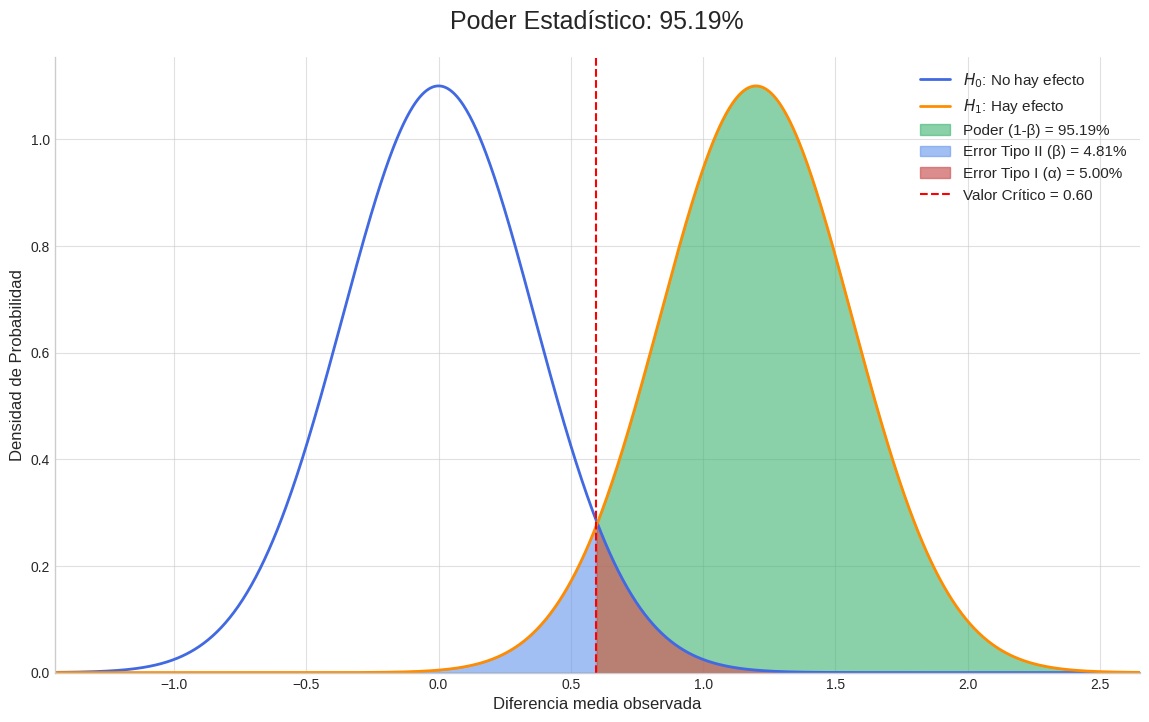

In [ ]:
#@title Explorando el poder estadístico
#@markdown Mueve los deslizadores para ver cómo el tamaño del efecto, el número de muestras y el nivel de significancia afectan al poder.

tamano_del_efecto = 1.2 #@param {type:"slider", min:0.1, max:8, step:0.1}
numero_de_muestras = 150 #@param {type:"slider", min:5, max:200, step:5}
significancia_alpha = 0.06 #@param {type:"slider", min:0.01, max:0.25, step:0.01}

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# --- Cálculos Estadísticos ---
# Desviación estándar de la población (asumida)
desviacion_estandar_poblacion = 5.0

# Error estándar de la media (disminuye con más muestras)
error_estandar = desviacion_estandar_poblacion / np.sqrt(numero_de_muestras)

# Distribución bajo la Hipótesis Nula (H0: no hay efecto)
media_nula = 0
dist_nula = stats.norm(loc=media_nula, scale=error_estandar)

# Distribución bajo la Hipótesis Alternativa (H1: sí hay efecto)
media_alternativa = tamano_del_efecto
dist_alternativa = stats.norm(loc=media_alternativa, scale=error_estandar)

# Valor crítico: el punto de corte para rechazar H0
# Para un test de una cola (buscamos un efecto positivo)
valor_critico = dist_nula.ppf(1 - significancia_alpha)

# Calcular Beta (Error Tipo II): P(No rechazar H0 | H0 es falsa)
# Es el área bajo la curva H1 a la izquierda del valor crítico
beta = dist_alternativa.cdf(valor_critico)

# Calcular Poder: 1 - Beta
poder = 1 - beta

# --- Visualización ---
fig, ax = plt.subplots(figsize=(14, 8))

# Rango para el eje X
x_min = min(media_nula, media_alternativa) - 4 * error_estandar
x_max = max(media_nula, media_alternativa) + 4 * error_estandar
x = np.linspace(x_min, x_max, 1000)

# Graficar las distribuciones
ax.plot(x, dist_nula.pdf(x), label='$H_0$: No hay efecto', color='royalblue', lw=2)
ax.plot(x, dist_alternativa.pdf(x), label='$H_1$: Hay efecto', color='darkorange', lw=2)

# Sombrear el área de Poder (1 - Beta)
ax.fill_between(x, 0, dist_alternativa.pdf(x), where=(x >= valor_critico), color='mediumseagreen', alpha=0.6, label=f'Poder (1-β) = {poder:.2%}')

# Sombrear el área de Beta (Error Tipo II)
ax.fill_between(x, 0, dist_alternativa.pdf(x), where=(x < valor_critico), color='cornflowerblue', alpha=0.6, label=f'Error Tipo II (β) = {beta:.2%}')

# Sombrear el área de Alpha (Error Tipo I)
ax.fill_between(x, 0, dist_nula.pdf(x), where=(x >= valor_critico), color='indianred', alpha=0.7, label=f'Error Tipo I (α) = {significancia_alpha:.2%}')

# Línea del valor crítico
ax.axvline(valor_critico, color='red', linestyle='--', lw=1.5, label=f'Valor Crítico = {valor_critico:.2f}')

# --- Etiquetas y Título ---
ax.set_title(f'Poder Estadístico: {poder:.2%}', fontsize=18, pad=20)
ax.set_xlabel('Diferencia media observada', fontsize=12)
ax.set_ylabel('Densidad de Probabilidad', fontsize=12)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, linestyle='-', alpha=0.6)

# Limpiar los ejes para una mejor vista
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(x_min, x_max)
ax.set_ylim(bottom=0)

plt.show()

## Estadístico de muestra

Una estadística de prueba $T(X)$ es un escalar que resume alguna característica de los datos de la muestra. El objetivo de definir una estadística de este tipo es que nos permita distinguir entre diferentes distribuciones y realizar nuestra prueba de hipótesis. Volviendo a nuestro ejemplo químico, si deseamos mostrar que una población se desempeña mejor que otra, podría ser razonable tomar la media como estadística de prueba. Diferentes opciones de estadística de prueba pueden conducir a una prueba estadística con un poder estadístico drásticamente diferente.

Con frecuencia, $T(X)$ (la distribución del estadístico de prueba bajo nuestra hipótesis nula) seguirá, al menos aproximadamente, una distribución de probabilidad común tal como una distribución normal cuando se considera bajo la hipótesis nula. Si podemos derivar explícitamente tal distribución y luego medir nuestra estadística de prueba en nuestro conjunto de datos, podemos rechazar con seguridad la hipótesis nula si nuestra estadística está muy fuera del rango que esperaríamos. Hacer esto cuantitativo nos lleva a la noción de $p$-valores.



## $p$-valor

Los $p$-valores (o el valor de probabilidad $p$) es la probabilidad de que $T(X)$ es al menos tan extrema como la estadística de prueba observada  $T(x)$ suponiendo que la hipótesis nula es verdadera, es decir,

$$ P_{H_0}(T(X)\geq T(x)) $$

Si el $p$-valor es menor o igual a un nivel de significación estadística predefinido y fijo $\alpha$, podemos rechazar la hipótesis nula. De lo contrario, concluiremos que nos falta evidencia para rechazar la hipótesis nula. Para una distribución de población dada, la región de rechazo será el intervalo contenido de todos los puntos que tiene un $p$-valor más pequeño que el nivel de significación estadística $\alpha$.


### Poniendo a prueba nuestras ideas: Hipótesis y evidencia

Imagina que eres un detective y tienes una "hipótesis nula" ($H_0$): la persona es inocente. Tu trabajo es buscar "evidencia" (tus datos de muestra) para ver si esa hipótesis sigue siendo plausible, o si la evidencia es tan fuerte que te obliga a "rechazar" la inocencia y sospechar culpabilidad.

En estadística, el procedimiento es similar:

*   **Hipótesis Nula ($H_0$):** Es nuestra suposición por defecto, lo que creemos que es cierto hasta que la evidencia nos diga lo contrario. Por ejemplo: "El nuevo algoritmo de IA no mejora el rendimiento del antiguo" o "No hay diferencia en el peso promedio entre dos grupos de frutas cultivadas con diferentes fertilizantes".
*   **Hipótesis Alternativa ($H_1$):** Es lo que intentamos demostrar si la $H_0$ resulta ser improbable. Por ejemplo: "El nuevo algoritmo *sí* mejora el rendimiento" o "Hay una diferencia en el peso promedio".

Cuando recolectamos datos de una muestra (por ejemplo, probamos el nuevo algoritmo 100 veces), necesitamos resumir esa información en un número que nos ayude a tomar una decisión. Este número es el **estadístico de prueba (T(X))**.

*   Piensa en él como un "indicador" o un "termómetro" que mide qué tan lejos está tu muestra de lo que esperarías si la $H_0$ fuera verdadera.
*   Si la $H_0$ fuera verdadera, esperaríamos que nuestro estadístico de prueba cayera en un rango "normal" o "esperado". Si cae muy lejos de ese rango, es una señal de que la $H_0$ podría no ser cierta.

Aquí es donde entra el **p-valor**, uno de los conceptos más importantes (y a veces malinterpretados) en estadística.

*   **Definición:** El p-valor es la probabilidad de observar una evidencia tan "extrema" (o más extrema) como la que obtuvimos, **suponiendo que la Hipótesis Nula ($H_0$) es realmente verdadera**.

*   **Intuición:** Imagina que la $H_0$ es verdadera (la persona es inocente). ¿Qué tan probable sería ver la evidencia que tienes en tus manos?
    *   **P-valor pequeño (ej. 0.01):** "¡Vaya! Si la persona fuera inocente, sería *muy, muy raro* ver esta evidencia. Solo hay un 1% de posibilidades. Esto es muy sorprendente."
    *   **P-valor grande (ej. 0.70):** "Bueno, si la persona fuera inocente, sería bastante normal ver esta evidencia. Hay un 70% de posibilidades. Esto no es nada sorprendente."

Para decidir si un p-valor es "suficientemente pequeño" para rechazar la $H_0$, necesitamos un umbral. Este umbral es el **nivel de significancia ($\alpha$)**.

*   **Definición:** $\alpha$ es la máxima probabilidad de rechazar la $H_0$ cuando en realidad es verdadera (cometer un error). Típicamente, $\alpha$ se fija en 0.05 (5%) o 0.01 (1%).

*   **La Decisión:**
    *   Si **p-valor $\le \alpha$**: Tu evidencia es *demasiado sorprendente* (o "extrema") si la $H_0$ fuera verdadera. Entonces, **rechazamos la $H_0$**. Decimos que tenemos evidencia estadística suficiente para apoyar la hipótesis alternativa.
    *   Si **p-valor $ > \alpha$**: Tu evidencia no es lo suficientemente sorprendente. **No tenemos suficiente evidencia para rechazar la $H_0$**. Esto *no* significa que la $H_0$ sea verdadera, solo que no pudimos probar lo contrario con la evidencia actual.

Visualmente, la **región de rechazo** son las "colas" de la distribución del estadístico de prueba (bajo $H_0$) donde el p-valor sería menor que $\alpha$. Si tu estadístico de prueba cae en esta región, es tan extremo que automáticamente rechazas $H_0$.

El siguiente gráfico te permitirá interactuar con estos conceptos clave. Podrás:

1.  **Ajustar el estadístico de prueba observado:** Mueve el valor de $T(x)$ y observa cómo cambia el p-valor.
2.  **Modificar el nivel de significancia ($\alpha$):** Mira cómo la región de rechazo se expande o contrae.
3.  **Cambiar el tipo de prueba (colas):** Entiende cómo "extremo" se define para pruebas de una o dos colas.

In [33]:
#@title Visualización del p-valor y la región de rechazo
import numpy as np
import plotly.graph_objects as go
from scipy import stats

# --- Parámetros interactivos ---
test_statistic_observed = 2.71 #@param {type:"slider", min:-3.5, max:3.5, step:0.01}
alpha_level = 0.05 #@param {type:"slider", min:0.001, max:0.2, step:0.001}
test_type = "two-sided" #@param ["two-sided", "greater", "less"]
mean_h0 = 0.0 #@param {type:"slider", min:-2.0, max:2.0, step:0.1}
std_dev_h0 = 1.0 #@param {type:"slider", min:0.1, max:2.0, step:0.1}

# --- Generar datos para la distribución bajo H0 (Normal) ---
x = np.linspace(mean_h0 - 4 * std_dev_h0, mean_h0 + 4 * std_dev_h0, 500)
y = stats.norm.pdf(x, loc=mean_h0, scale=std_dev_h0)

# --- Calcular P-valor y Valores Críticos ---
p_value = 0.0
critical_values_text = ""
critical_value_1 = None
critical_value_2 = None # Para test de dos colas

fig = go.Figure()

# --- 1. Dibujar la distribución H0 ---
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'H0: Distribución de la diferencia (μ={mean_h0:.1f}, σ={std_dev_h0:.1f})',
                         line=dict(color='blue', width=2)))

# --- 2. Calcular y sombrear la Región de Rechazo (Alpha) ---
if test_type == "two-sided":
    critical_value_1 = stats.norm.ppf(alpha_level / 2, loc=mean_h0, scale=std_dev_h0)
    critical_value_2 = stats.norm.ppf(1 - alpha_level / 2, loc=mean_h0, scale=std_dev_h0)

    # Sombra la cola izquierda para alpha
    x_rejection_left = x[x <= critical_value_1]
    y_rejection_left = y[x <= critical_value_1]
    fig.add_trace(go.Scatter(x=np.concatenate([x_rejection_left, [critical_value_1], [x_rejection_left[0]]]),
                             y=np.concatenate([y_rejection_left, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 100, 100, 0.2)', # Rojo claro para alpha
                             name=f'Región de Rechazo (α={alpha_level:.3f})',
                             hovertemplate="<b>Región de rechazo</b><br>Prob. de error Tipo I<extra></extra>"))
    # Sombra la cola derecha para alpha
    x_rejection_right = x[x >= critical_value_2]
    y_rejection_right = y[x >= critical_value_2]
    fig.add_trace(go.Scatter(x=np.concatenate([x_rejection_right, [critical_value_2], [x_rejection_right[-1]]]),
                             y=np.concatenate([y_rejection_right, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 100, 100, 0.2)',
                             showlegend=False,
                             hovertemplate="<b>Región de rechazo</b><br>Prob. de error Tipo I<extra></extra>"))

    p_value = 2 * stats.norm.sf(abs(test_statistic_observed - mean_h0), loc=0, scale=std_dev_h0) # Ajuste para p_valor
    critical_values_text = f"Límites críticos ({alpha_level:.3f}): {critical_value_1:.3f} y {critical_value_2:.3f}"

elif test_type == "greater":
    critical_value_1 = stats.norm.ppf(1 - alpha_level, loc=mean_h0, scale=std_dev_h0)
    x_rejection = x[x >= critical_value_1]
    y_rejection = y[x >= critical_value_1]
    fig.add_trace(go.Scatter(x=np.concatenate([x_rejection, [critical_value_1], [x_rejection[-1]]]),
                             y=np.concatenate([y_rejection, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 100, 100, 0.2)',
                             name=f'Región de rechazo (α={alpha_level:.3f})',
                             hovertemplate="<b>Región de rechazo</b><br>Prob. de error Tipo I<extra></extra>"))
    p_value = stats.norm.sf(test_statistic_observed, loc=mean_h0, scale=std_dev_h0)
    critical_values_text = f"Límite crítico ({alpha_level:.3f}): {critical_value_1:.3f}"

elif test_type == "less":
    critical_value_1 = stats.norm.ppf(alpha_level, loc=mean_h0, scale=std_dev_h0)
    x_rejection = x[x <= critical_value_1]
    y_rejection = y[x <= critical_value_1]
    fig.add_trace(go.Scatter(x=np.concatenate([x_rejection, [critical_value_1], [x_rejection[0]]]),
                             y=np.concatenate([y_rejection, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 100, 100, 0.2)',
                             name=f'Región de rechazo (α={alpha_level:.3f})',
                             hovertemplate="<b>Región de rechazo</b><br>Prob. de error Tipo I<extra></extra>"))
    p_value = stats.norm.cdf(test_statistic_observed, loc=mean_h0, scale=std_dev_h0)
    critical_values_text = f"Límite crítico ({alpha_level:.3f}): {critical_value_1:.3f}"

# --- 3. Dibujar el Estadístico de Prueba Observado ---
fig.add_vline(x=test_statistic_observed, line_dash="solid", line_color="black", line_width=2,
              annotation_text=f"Tu resultado observado = {test_statistic_observed:.3f}",
              annotation_position="top right",
              name="Resultado observado")

# --- 4. Sombrear la Región del P-valor (¡esta es la clave!) ---
# P-valor es el área en las colas MÁS ALLÁ del estadístico observado
if test_type == "two-sided":
    # Cola correspondiente al estadístico observado
    if test_statistic_observed >= mean_h0:
        x_p_value_main = x[x >= test_statistic_observed]
        y_p_value_main = y[x >= test_statistic_observed]
        x_p_value_sym = x[x <= (mean_h0 - (test_statistic_observed - mean_h0))]
        y_p_value_sym = y[x <= (mean_h0 - (test_statistic_observed - mean_h0))]
    else: # test_statistic_observed < mean_h0
        x_p_value_main = x[x <= test_statistic_observed]
        y_p_value_main = y[x <= test_statistic_observed]
        x_p_value_sym = x[x >= (mean_h0 + (mean_h0 - test_statistic_observed))]
        y_p_value_sym = y[x >= (mean_h0 + (mean_h0 - test_statistic_observed))]

    # Sombra la cola principal
    fig.add_trace(go.Scatter(x=np.concatenate([x_p_value_main, [x_p_value_main[-1]], [x_p_value_main[0]]]),
                             y=np.concatenate([y_p_value_main, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 0, 0, 0.5)', # Rojo oscuro para p-valor
                             name=f'P-valor (Área más extrema) = {p_value:.3f}',
                             hovertemplate="<b>P-valor</b><br>Prob. de ver un resultado tan extremo o más<br>si H0 fuera cierta<extra></extra>"))
    # Sombra la cola simétrica
    fig.add_trace(go.Scatter(x=np.concatenate([x_p_value_sym, [x_p_value_sym[-1]], [x_p_value_sym[0]]]),
                             y=np.concatenate([y_p_value_sym, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 0, 0, 0.5)',
                             showlegend=False,
                             hovertemplate="<b>P-valor</b><br>Prob. de ver un resultado tan extremo o más<br>si H0 fuera cierta<extra></extra>"))

elif test_type == "greater":
    x_p_value = x[x >= test_statistic_observed]
    y_p_value = y[x >= test_statistic_observed]
    fig.add_trace(go.Scatter(x=np.concatenate([x_p_value, [test_statistic_observed], [x_p_value[-1]]]),
                             y=np.concatenate([y_p_value, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 0, 0, 0.5)',
                             name=f'P-valor (Área a la derecha) = {p_value:.3f}',
                             hovertemplate="<b>P-valor</b><br>Prob. de ver un resultado tan extremo o más<br>si H0 fuera cierta<extra></extra>"))

elif test_type == "less":
    x_p_value = x[x <= test_statistic_observed]
    y_p_value = y[x <= test_statistic_observed]
    fig.add_trace(go.Scatter(x=np.concatenate([x_p_value, [test_statistic_observed], [x_p_value[0]]]),
                             y=np.concatenate([y_p_value, [0], [0]]),
                             fill='toself', mode='none', fillcolor='rgba(255, 0, 0, 0.5)',
                             name=f'P-valor (Área a la izquierda) = {p_value:.3f}',
                             hovertemplate="<b>P-valor</b><br>Prob. de ver un resultado tan extremo o más<br>si H0 fuera cierta<extra></extra>"))


# --- 5. Dibujar los Valores Críticos ---
if test_type == "two-sided":
    fig.add_vline(x=critical_value_1, line_dash="dot", line_color="darkred",
                  annotation_text=f"Límite crítico inferior", annotation_position="bottom left",
                  name=f"Límite crítico inferior")
    fig.add_vline(x=critical_value_2, line_dash="dot", line_color="darkred",
                  annotation_text=f"Límite crítico superior", annotation_position="bottom right",
                  name=f"Límite crítico superior")
else:
    fig.add_vline(x=critical_value_1, line_dash="dot", line_color="darkred",
                  annotation_text=f"Límite crítico", annotation_position="bottom right" if test_type=="greater" else "bottom left",
                  name=f"Límite crítico")


# --- 6. Decisión y Título ---
decision_text = ""
if p_value <= alpha_level:
    decision_text = f"<b>¡P-valor ({p_value:.3f}) ≤ $\\alpha$ ({alpha_level:.3f})! Rechazamos la Hipótesis Nula.</b>"
    decision_color = "green"
else:
    decision_text = f"<b>P-valor ({p_value:.3f}) > $\\alpha$ ({alpha_level:.3f}). No hay evidencia para rechazar la Hipótesis Nula.</b>"
    decision_color = "red"

fig.update_layout(
    title=f'<b>P-valor y región de rechazo (Test {test_type.replace("-"," ")}):</b><br><span style="color:{decision_color};">{decision_text}</span>',
    xaxis_title="Valor del estadístico de prueba",
    yaxis_title="Densidad de probabilidad (Bajo H0)",
    hovermode="x unified",
    template="plotly_white",
    height=600,
    legend_title_text="Elementos del gráfico"
)

fig.show()

## Pasos generales de la prueba de hipótesis

Después de familiarizarse con los conceptos anteriores, repasemos los pasos generales de la prueba de hipótesis.

* Formular la pregunta y establecer una hipótesis nula.

* Establecer el nivel de significación estadística $\alpha$ y una potencia estadística $1-\beta$.

* Obtener muestras a través de experimentos. El número de muestras necesarias dependerá de la potencia estadística y del tamaño del efecto esperado.

* Calcule el estadístico de prueba y el $p$-valor.

* Tomar la decisión de mantener o rechazar la hipótesis nula con base en la $p$-valor y el nivel de significación estadística $\alpha$.

Para realizar una prueba de hipótesis, comenzamos definiendo una hipótesis nula y un nivel de riesgo que estamos dispuestos a asumir. Luego calculamos el estadístico de prueba de la muestra, tomando un valor extremo del estadístico de prueba como evidencia en contra de la hipótesis nula. Si el estadístico de prueba cae dentro de la región de rechazo, podemos rechazar la hipótesis nula a favor de la alternativa.

La prueba de hipótesis es aplicable en una variedad de escenarios, como los ensayos clínicos y las pruebas A/B.

# *A-B testing*


## Ejemplo introductorio: Caso binario

Haremos una prueba A/B para una empresa hipotética que está tratando de aumentar la cantidad de usuarios que se registran en una cuenta premium. El objetivo de ejecutar una prueba A/B es evaluar si un cambio en un sitio web conducirá a un mejor rendimiento en una métrica específica. Puede decidir probar alternativas muy simples, como cambiar la apariencia de un solo botón en una página web o probar diferentes diseños y títulos. También puede ejecutar una prueba A/B en procesos de varios pasos que pueden tener muchas diferencias. Ejemplos de esto incluyen los pasos necesarios para registrar a un nuevo usuario o procesar la venta en un mercado en línea. Las pruebas A/B son un tema muy amplio y existen muchas técnicas y reglas para configurar un experimento.

### Configure el experimento

Antes de ejecutar la prueba, conoceremos la tasa de conversión de referencia y el impulso o aumento deseado en las suscripciones que nos gustaría probar. La tasa de conversión de referencia es la tasa actual a la que registramos nuevos usuarios bajo el diseño existente. Para nuestro ejemplo, queremos usar nuestra prueba para confirmar que los cambios que hacemos en nuestro proceso de registro darán como resultado un aumento de al menos un 2 % en nuestra tasa de registro. Actualmente registramos 10 de cada 100 usuarios a los que se les ofrece una cuenta premium.

#### Grupo de control (A) y Grupo de prueba (B)

Normalmente, la cantidad total de usuarios que participan en la prueba A/B constituye un pequeño porcentaje de la cantidad total de usuarios. Los usuarios se seleccionan aleatoriamente y se asignan a un grupo de control o a un grupo de prueba. El tamaño de la muestra que decida determinará cuánto tiempo tendrá que esperar hasta que haya recolectado suficiente. Por ejemplo, los sitios web con grandes audiencias pueden recopilar suficientes datos muy rápidamente, mientras que otros sitios web pueden tener que esperar varias semanas. Hay algunos eventos que ocurren con poca frecuencia, incluso en sitios web con mucho tráfico, por lo que determinar el tamaño de muestra necesario le informará qué tan pronto puede evaluar su experimento y pasar a mejorar otras métricas.

Inicialmente, recopilaremos 1000 usuarios para cada grupo y mostraremos la página de registro actual al grupo de control y una nueva página de registro al grupo de prueba.

In [34]:
#@title Ajuste de parámetros para la simulación de A/B Test y el gráfico
#@markdown Ajusta la tasa de conversión de referencia (`bcr`) y la tasa de conversión *esperada* del grupo de prueba (`d_hat`).
#@markdown Además, configura los tamaños muestrales ($N_A$ para Control y $N_B$ para Prueba) para cada grupo.
bcr = 0.1 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
d_hat = 0.12 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
N_A = 300 #@param {type:"slider", min:50, max:10000, step:50}
N_B = 300 #@param {type:"slider", min:50, max:10000, step:50}

# Req
import pandas as pd
import numpy as np
import scipy.stats as scs
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Función generate_data (copiada de tu contexto) ---
def generate_data(N_A, N_B, p_A, p_B, days=None, control_label='Control (A)', test_label='Test (B)'):
    """Returns a pandas dataframe with fake CTR data
    Example:
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
            Note: final sample size may not match N_A provided because the
            group at each row is chosen at random (50/50).
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        days (int): optional; if provided, a column for 'ts' will be included
            to divide the data in chunks of time
            Note: overflow data will be included in an extra day
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """

    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    # distribute events based on proportion of group size
    group_bern = scs.bernoulli(N_A / (N_A + N_B)) # 0 for A, 1 for B (this is how the code was structured)

    # initiate bernoulli distributions from which to randomly sample
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = idx // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        # NOTE: The original generate_data randomly assigns 0 or 1 for group.
        # This means the *final* N_A and N_B might deviate slightly from the input.
        # For a truly fixed N_A and N_B, one would generate N_A rows for group 0 and N_B for group 1 directly.
        # Given the provided function, we stick to its behavior.
        row['group_idx'] = group_bern.rvs()

        if row['group_idx'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group_idx'].apply(
        lambda x: control_label if x == 0 else test_label)
    df.drop('group_idx', axis=1, inplace=True) # remove temporary column

    return df

# --- Generación de datos y resumen (como en tu contexto, pero con etiquetas más descriptivas) ---
ab_data = generate_data(N_A, N_B, bcr, d_hat, control_label='Control (A)', test_label='Test (B)')

# Calcular el resumen como en tu contexto
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')

# --- Cálculo de Intervalos de Confianza (95%) para las Tasas de Conversión ---
# Utilizaremos la aproximación normal para el intervalo de confianza de una proporción binomial.
# Para N grandes, es una buena aproximación. Para N pequeños o proporciones muy cercanas a 0 o 1,
# se preferirían métodos como el intervalo de Wilson Score, pero para una introducción, este es suficiente.
alpha_ci = 0.05 # Nivel de significancia para el CI (95% CI -> 1 - alpha = 0.95)
z_score = scs.norm.ppf(1 - alpha_ci / 2) # Z-score para 95% de confianza (aprox. 1.96)

ab_summary['ci_lower'] = ab_summary.apply(
    lambda row: row['rate'] - z_score * np.sqrt(row['rate'] * (1 - row['rate']) / row['total']) if row['total'] > 0 else 0, axis=1
)
ab_summary['ci_upper'] = ab_summary.apply(
    lambda row: row['rate'] + z_score * np.sqrt(row['rate'] * (1 - row['rate']) / row['total']) if row['total'] > 0 else 0, axis=1
)

# Asegurar que los límites del CI estén entre 0 y 1
ab_summary['ci_lower'] = ab_summary['ci_lower'].clip(lower=0)
ab_summary['ci_upper'] = ab_summary['ci_upper'].clip(upper=1)

# --- Visualización Interactiva con Plotly ---

# Crear subplots: uno para la tasa de conversión, otro para el número total de conversiones
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Tasa de Conversión (%) con Intervalos de Confianza (95%)',
                                    'Número Total de Conversiones'),
                    horizontal_spacing=0.15)

# Calcular la diferencia en las tasas para la anotación
rate_A = ab_summary.loc['Control (A)', 'rate'] * 100 if 'Control (A)' in ab_summary.index else np.nan
rate_B = ab_summary.loc['Test (B)', 'rate'] * 100 if 'Test (B)' in ab_summary.index else np.nan
rate_diff = (rate_B - rate_A) if not np.isnan(rate_A) and not np.isnan(rate_B) else np.nan

# Plot 1: Tasa de Conversión con Intervalos de Confianza
fig.add_trace(
    go.Bar(
        x=ab_summary.index,
        y=ab_summary['rate'] * 100, # Convertir a porcentaje
        name='Tasa de Conversión',
        marker_color=['skyblue', 'lightcoral'], # Colores personalizados para los grupos
        text=[f"{r*100:.2f}%" for r in ab_summary['rate']],
        textposition='outside',
        hovertemplate=(
            "<b>Grupo:</b> %{x}<br>" +
            "<b>Tasa de Conversión:</b> %{y:.2f}%<br>" +
            "<b>Conversiones:</b> %{customdata[0]:d}<br>" +
            "<b>Total Usuarios:</b> %{customdata[1]:d}<br>" +
            "<b>CI 95% Inferior:</b> %{customdata[2]:.2f}%<br>" +
            "<b>CI 95% Superior:</b> %{customdata[3]:.2f}%<extra></extra>"
        ),
        customdata=np.stack((ab_summary['converted'],
                             ab_summary['total'],
                             ab_summary['ci_lower'] * 100,
                             ab_summary['ci_upper'] * 100), axis=-1),
        error_y=dict(
            type='data',
            symmetric=False,
            array=(ab_summary['ci_upper'] - ab_summary['rate']) * 100, # Diferencia entre CI superior y la media
            arrayminus=(ab_summary['rate'] - ab_summary['ci_lower']) * 100, # Diferencia entre la media y CI inferior
            visible=True,
            color='gray',
            thickness=1.5,
            width=5
        )
    ),
    row=1, col=1
)

# Plot 2: Número Total de Conversiones
fig.add_trace(
    go.Bar(
        x=ab_summary.index,
        y=ab_summary['converted'],
        name='Total Conversiones',
        marker_color=['skyblue', 'lightcoral'],
        text=[f"{c:d}" for c in ab_summary['converted']],
        textposition='outside',
        hovertemplate=(
            "<b>Grupo:</b> %{x}<br>" +
            "<b>Conversiones:</b> %{y:d}<br>" +
            "<b>Total Usuarios:</b> %{customdata[0]:d}<extra></extra>"
        ),
        customdata=np.stack((ab_summary['total'],), axis=-1)
    ),
    row=1, col=2
)

# Actualizar el layout del gráfico
fig.update_layout(
    title_text='Resultados de la Prueba A/B: Conversión por Grupo',
    height=500,
    showlegend=False,
    # Añadir una anotación para la diferencia de tasas observada
    annotations=[
        go.layout.Annotation(
            xref="paper", yref="paper",
            x=0.5, y=1.15, # Posición de la anotación (ajustar si es necesario)
            text=f"Diferencia observada en tasas: {'+' if rate_diff > 0 else ''}{rate_diff:.2f}%",
            showarrow=False,
            font=dict(size=14, color="darkred")
        ) if not np.isnan(rate_diff) else go.layout.Annotation(visible=False) # Solo mostrar si hay datos válidos
    ]
)

# Actualizar ejes Y para el primer subplot (Tasa de Conversión)
# Asegurar que el eje Y comience en 0 y se extienda un poco más allá del CI superior máximo
max_ci_upper = ab_summary['ci_upper'].max() * 100 * 1.1 if not ab_summary.empty else 15
fig.update_yaxes(title_text='Tasa de Conversión (%)', row=1, col=1, range=[0, max(max_ci_upper, 15)])
fig.update_xaxes(title_text='Grupo', row=1, col=1)

# Actualizar ejes Y para el segundo subplot (Número Total de Conversiones)
fig.update_yaxes(title_text='Número de Conversiones', row=1, col=2, rangemode='tozero')
fig.update_xaxes(title_text='Grupo', row=1, col=2)

fig.show()

/tmp/ipython-input-1934803496.py:87: FutureWarning:

The provided callable <function sum at 0x7e3347350b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



### Compara los dos grupos
Podemos comparar los dos grupos trazando la distribución del grupo de control y calculando la probabilidad de obtener el resultado de nuestro grupo de prueba. Podemos suponer que la distribución de nuestro grupo de control es binomial porque los datos son una serie de ensayos de Bernoulli, donde cada ensayo solo tiene dos resultados posibles (similar a lanzar una moneda).

In [37]:
#@title Ajuste de parámetros para la simulación de A/B Test y el gráfico de distribuciones
#@markdown Ajusta la tasa de conversión de referencia (`bcr`) y la tasa de conversión *esperada* del grupo de prueba (`d_hat`).
#@markdown Además, configura los tamaños muestrales ($N_A$ para Control y $N_B$ para Prueba) para cada grupo.
bcr = 0.1 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
d_hat = 0.12 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
N_A = 500 #@param {type:"slider", min:100, max:2500, step:100}
N_B = 300 #@param {type:"slider", min:100, max:2500, step:100}

# Req
import pandas as pd
import numpy as np
import scipy.stats as scs
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Función generate_data (asegura N_A y N_B exactos) ---
def generate_data(N_A, N_B, p_A, p_B, control_label='Control (A)', test_label='Test (B)'):
    """Returns a pandas dataframe with fake CTR data
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """
    data_A = {
        'group': control_label,
        'converted': scs.bernoulli(p_A).rvs(N_A)
    }
    data_B = {
        'group': test_label,
        'converted': scs.bernoulli(p_B).rvs(N_B)
    }

    df_A = pd.DataFrame(data_A)
    df_B = pd.DataFrame(data_B)

    df = pd.concat([df_A, df_B], ignore_index=True)
    return df

# --- Generación de datos y resumen ---
ab_data = generate_data(N_A, N_B, bcr, d_hat, control_label='Control (A)', test_label='Test (B)')

# Calcular el resumen (para obtener las tasas y totales *observados*)
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')

# --- Preparación para la aproximación normal de las distribuciones de tasas ---
# ¡CRUCIAL! Las medias y desviaciones estándar para las *curvas de distribución*
# ahora se basan en las tasas *observadas* (rate) y los tamaños muestrales *observados* (total)
# de ab_summary. Esto representa la distribución muestral de la proporción
# *asumiendo que la tasa observada es la mejor estimación de la tasa real de la población*.

# Parámetros INFERIDOS desde la MUESTRA para el grupo de Control (A)
# Utilizamos la tasa observada (p_hat) como la media de nuestra distribución inferida
# y la desviación estándar de la distribución muestral de la proporción
# (conocida como error estándar)
observed_N_A = ab_summary.loc['Control (A)', 'total']
observed_rate_A = ab_summary.loc['Control (A)', 'rate']
mean_rate_A_inferred = observed_rate_A
std_rate_A_inferred = np.sqrt(observed_rate_A * (1 - observed_rate_A) / observed_N_A)

# Parámetros INFERIDOS desde la MUESTRA para el grupo de Prueba (B)
observed_N_B = ab_summary.loc['Test (B)', 'total']
observed_rate_B = ab_summary.loc['Test (B)', 'rate']
mean_rate_B_inferred = observed_rate_B
std_rate_B_inferred = np.sqrt(observed_rate_B * (1 - observed_rate_B) / observed_N_B)

# Conversiones OBSERVADAS (para los tooltips)
observed_conversions_A = ab_summary.loc['Control (A)', 'converted']
observed_conversions_B = ab_summary.loc['Test (B)', 'converted']

# Rango para el eje X (tasas de conversión)
# Queremos un rango que cubra ambas distribuciones inferidas suficientemente bien, idealmente entre 0 y 1.
# Calculamos un rango que abarque ±4 desviaciones estándar de ambas medias inferidas.
min_val = min(mean_rate_A_inferred - 4 * std_rate_A_inferred, mean_rate_B_inferred - 4 * std_rate_B_inferred)
max_val = max(mean_rate_A_inferred + 4 * std_rate_A_inferred, mean_rate_B_inferred + 4 * std_rate_B_inferred)
x_range = np.linspace(max(0, min_val), min(1, max_val), 500) # Asegurarse de que el rango esté entre 0 y 1

# Calcular los valores de la Función de Densidad de Probabilidad (PDF) para ambas normales
pdf_A = scs.norm.pdf(x_range, loc=mean_rate_A_inferred, scale=std_rate_A_inferred)
pdf_B = scs.norm.pdf(x_range, loc=mean_rate_B_inferred, scale=std_rate_B_inferred)

# --- Visualización Interactiva con Plotly ---

fig = go.Figure()

# Distribución del Grupo de Control (A)
fig.add_trace(go.Scatter(
    x=x_range * 100, # Mostrar en porcentaje para mejor lectura
    y=pdf_A,
    mode='lines',
    name=f'Control (A) - Inferida (μ={mean_rate_A_inferred*100:.2f}%, σ={std_rate_A_inferred*100:.2f}%)',
    line=dict(color='red', width=2),
    hovertemplate=(
        "<b>Control (A) Inferido</b><br>" +
        "<b>Tasa de Conversión:</b> %{x:.2f}%<br>" +
        "<b>Densidad de Probabilidad:</b> %{y:.4f}<extra></extra>"
    )
))

# Línea vertical para el resultado observado del Grupo de Control
# En este caso, la media de la distribución inferida ES el resultado observado,
# por lo que la línea vertical se alinea perfectamente con la cúspide de su propia curva.
fig.add_vline(
    x=observed_rate_A * 100, # Mostrar en porcentaje
    line_dash="dash", line_color="red",
    annotation_text=f"Observed control (A): {observed_rate_A*100:.2f}% ({observed_conversions_A} conv. de {observed_N_A})",
    annotation_position="top left",
    annotation_font_color="red",
    name="Observed control"
)

# Línea vertical para el resultado observado del Grupo de Prueba
fig.add_vline(
    x=observed_rate_B * 100, # Mostrar en porcentaje
    line_dash="dash", line_color="blue",
    annotation_text=f"Observed test (B): {observed_rate_B*100:.2f}% ({observed_conversions_B} conv. de {observed_N_B})",
    annotation_position="top right",
    annotation_font_color="blue",
    name="Observed test"
)

# Añadir una anotación para la "probabilidad" de observar la tasa del grupo de prueba
# ASUMIENDO que la tasa real de la población fuera la del grupo de control.
# Aquí es donde usamos la distribución INFERIDA del control y evaluamos la tasa OBSERVADA del test.
prob_at_test_on_control = scs.norm.pdf(observed_rate_B, loc=mean_rate_A_inferred, scale=std_rate_A_inferred)

# Solo si el valor observado está dentro de un rango razonable de la distribución del control
# (e.g., dentro de 3 desviaciones estándar para que la densidad sea visible)
if observed_rate_B >= (mean_rate_A_inferred - 3 * std_rate_A_inferred) and \
   observed_rate_B <= (mean_rate_A_inferred + 3 * std_rate_A_inferred):
    fig.add_annotation(
        x=observed_rate_B * 100, # Mostrar en porcentaje
        y=prob_at_test_on_control,
        text=f"Densidad control en tasa obs test: {prob_at_test_on_control:.4f}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(color="darkgreen", size=10),
        bgcolor="rgba(255, 255, 255, 0.7)",
        bordercolor="darkgreen",
        borderwidth=1,
        borderpad=4
    )


# Layout del gráfico
fig.update_layout(
    title_text='Distribuciones de tasas de conversión inferidas a partir de la muestra',
    xaxis_title='Tasa de conversión (%)',
    yaxis_title='Densidad de probabilidad',
    hovermode="x unified",
    height=550,
    legend_title_text='Grupos',
    template="plotly_white",
    xaxis=dict(range=[max(0, x_range.min() * 100 * 0.9), min(100, x_range.max() * 100 * 1.05)]) # Rango de 0 a 100%
)

fig.show()

/tmp/ipython-input-4024324276.py:48: FutureWarning:

The provided callable <function sum at 0x7e3347350b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



La distribución del grupo de control se muestra en rojo y el resultado del grupo de prueba se indica con la línea discontinua azul. Podemos ver que la probabilidad de obtener el resultado del grupo de prueba era muy baja. Sin embargo, la probabilidad no transmite el nivel de confianza de los resultados. No tiene en cuenta el tamaño de la muestra de nuestro grupo de prueba. Intuitivamente, nos sentiríamos más seguros de nuestros resultados a medida que aumenta el tamaño de nuestras muestras. Continuemos y representemos los resultados del grupo de prueba como una distribución binomial y comparemos las distribuciones entre sí.

Podemos ver que el grupo de prueba convirtió a más usuarios que el grupo de control. También podemos ver que el pico de los resultados del grupo de prueba es más bajo que el del grupo de control. ¿Cómo interpretamos la diferencia en la probabilidad máxima? Deberíamos centrarnos en cambio en la tasa de conversión para que tengamos una comparación de manzanas con manzanas. Para calcular esto, necesitamos estandarizar los datos y comparar la probabilidad de éxito, $p$, para cada grupo.

#### Distribución de Bernoulli y TCL

Para hacer esto, primero, considere la distribución de Bernoulli para el grupo de control:

$$ X\sim \mathcal{B}(p)$$

donde $ $es la probabilidad de conversión del grupo de control. Teniendo en cuenta las propiedades de la distribución de Bernoulli, la media y la varianza son las siguientes:

$$E[X]=p,\quad Var[X]=p\cdot(1-p)$$

De acuerdo con el teorema central del límite, calculando muchas medias muestrales podemos aproximarnos a la verdadera media de la población, $\mu$, de la que se tomaron los datos para el grupo de control. La distribución de las medias muestrales, $p$, se distribuirá normalmente alrededor de la media verdadera con una desviación estándar igual al error estándar de la media. La ecuación para esto se da como:

$$ \sigma_{\hat{x}}\rightarrow \frac{1}{\sqrt{n}}\sigma_X = \sqrt{\frac{p\cdot(1-p)}{n}} $$

Por tanto, podemos representar ambos grupos como una distribución normal con las siguientes propiedades:

$$\hat{p}\sim\mathcal{N}\left(p, \sqrt{\frac{p\cdot(1-p)}{n}}\right)$$

Lo mismo se puede hacer para el grupo de prueba. Entonces, tendremos dos distribuciones normales para $p_A$ y $p_B$:


In [40]:
#@title Ajuste de parámetros para la simulación de A/B Test y el gráfico de distribuciones
#@markdown Ajusta la tasa de conversión de referencia (`bcr`) y la tasa de conversión *esperada* del grupo de prueba (`d_hat`).
#@markdown Además, configura los tamaños muestrales ($N_A$ para Control y $N_B$ para Prueba) para cada grupo.
bcr = 0.1 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
d_hat = 0.12 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
N_A = 500 #@param {type:"slider", min:100, max:2500, step:100}
N_B = 300 #@param {type:"slider", min:100, max:2500, step:100}

# Req
import pandas as pd
import numpy as np
import scipy.stats as scs
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Función generate_data (asegura N_A y N_B exactos) ---
def generate_data(N_A, N_B, p_A, p_B, control_label='Control (A)', test_label='Test (B)'):
    """Returns a pandas dataframe with fake CTR data
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """
    data_A = {
        'group': control_label,
        'converted': scs.bernoulli(p_A).rvs(N_A)
    }
    data_B = {
        'group': test_label,
        'converted': scs.bernoulli(p_B).rvs(N_B)
    }

    df_A = pd.DataFrame(data_A)
    df_B = pd.DataFrame(data_B)

    df = pd.concat([df_A, df_B], ignore_index=True)
    return df

# --- Generación de datos y resumen ---
ab_data = generate_data(N_A, N_B, bcr, d_hat, control_label='Control (A)', test_label='Test (B)')

# Calcular el resumen (para obtener las tasas y totales *observados*)
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')

# --- Preparación para la aproximación normal de las distribuciones de tasas ---
# ¡CRUCIAL! Las medias y desviaciones estándar para las *curvas de distribución*
# ahora se basan en las tasas *observadas* (rate) y los tamaños muestrales *observados* (total)
# de ab_summary. Esto representa la distribución muestral de la proporción
# *asumiendo que la tasa observada es la mejor estimación de la tasa real de la población*.

# Parámetros INFERIDOS desde la MUESTRA para el grupo de Control (A)
# Utilizamos la tasa observada (p_hat) como la media de nuestra distribución inferida
# y la desviación estándar de la distribución muestral de la proporción
# (conocida como error estándar)
observed_N_A = ab_summary.loc['Control (A)', 'total']
observed_rate_A = ab_summary.loc['Control (A)', 'rate']
mean_rate_A_inferred = observed_rate_A
std_rate_A_inferred = np.sqrt(observed_rate_A * (1 - observed_rate_A) / observed_N_A)

# Parámetros INFERIDOS desde la MUESTRA para el grupo de Prueba (B)
observed_N_B = ab_summary.loc['Test (B)', 'total']
observed_rate_B = ab_summary.loc['Test (B)', 'rate']
mean_rate_B_inferred = observed_rate_B
std_rate_B_inferred = np.sqrt(observed_rate_B * (1 - observed_rate_B) / observed_N_B)

# Conversiones OBSERVADAS (para los tooltips)
observed_conversions_A = ab_summary.loc['Control (A)', 'converted']
observed_conversions_B = ab_summary.loc['Test (B)', 'converted']

# Rango para el eje X (tasas de conversión)
# Queremos un rango que cubra ambas distribuciones inferidas suficientemente bien, idealmente entre 0 y 1.
# Calculamos un rango que abarque ±4 desviaciones estándar de ambas medias inferidas.
min_val = min(mean_rate_A_inferred - 4 * std_rate_A_inferred, mean_rate_B_inferred - 4 * std_rate_B_inferred)
max_val = max(mean_rate_A_inferred + 4 * std_rate_A_inferred, mean_rate_B_inferred + 4 * std_rate_B_inferred)
x_range = np.linspace(max(0, min_val), min(1, max_val), 500) # Asegurarse de que el rango esté entre 0 y 1

# Calcular los valores de la Función de Densidad de Probabilidad (PDF) para ambas normales
pdf_A = scs.norm.pdf(x_range, loc=mean_rate_A_inferred, scale=std_rate_A_inferred)
pdf_B = scs.norm.pdf(x_range, loc=mean_rate_B_inferred, scale=std_rate_B_inferred)

# --- Visualización Interactiva con Plotly ---

fig = go.Figure()

# Distribución del Grupo de Control (A)
fig.add_trace(go.Scatter(
    x=x_range * 100, # Mostrar en porcentaje para mejor lectura
    y=pdf_A,
    mode='lines',
    name=f'Control (A) - Inferida (μ={mean_rate_A_inferred*100:.2f}%, σ={std_rate_A_inferred*100:.2f}%)',
    line=dict(color='red', width=2),
    hovertemplate=(
        "<b>Control (A) Inferido</b><br>" +
        "<b>Tasa de Conversión:</b> %{x:.2f}%<br>" +
        "<b>Densidad de Probabilidad:</b> %{y:.4f}<extra></extra>"
    )
))

# Distribución del Grupo de Prueba (B)
fig.add_trace(go.Scatter(
    x=x_range * 100, # Mostrar en porcentaje para mejor lectura
    y=pdf_B,
    mode='lines',
    name=f'Test (B) - Inferida (μ={mean_rate_B_inferred*100:.2f}%, σ={std_rate_B_inferred*100:.2f}%)',
    line=dict(color='blue', width=2),
    hovertemplate=(
        "<b>Test (B) Inferido</b><br>" +
        "<b>Tasa de conversión:</b> %{x:.2f}%<br>" +
        "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
    )
))

# Línea vertical para el resultado observado del Grupo de Control
# En este caso, la media de la distribución inferida ES el resultado observado,
# por lo que la línea vertical se alinea perfectamente con la cúspide de su propia curva.
fig.add_vline(
    x=observed_rate_A * 100, # Mostrar en porcentaje
    line_dash="dash", line_color="red",
    annotation_text=f"Observed control (A): {observed_rate_A*100:.2f}% ({observed_conversions_A} conv. de {observed_N_A})",
    annotation_position="top left",
    annotation_font_color="red",
    name="Observed control"
)

# Línea vertical para el resultado observado del Grupo de Prueba
fig.add_vline(
    x=observed_rate_B * 100, # Mostrar en porcentaje
    line_dash="dash", line_color="blue",
    annotation_text=f"Observed test (B): {observed_rate_B*100:.2f}% ({observed_conversions_B} conv. de {observed_N_B})",
    annotation_position="top right",
    annotation_font_color="blue",
    name="Observed test"
)

# Añadir una anotación para la "probabilidad" de observar la tasa del grupo de prueba
# ASUMIENDO que la tasa real de la población fuera la del grupo de control.
# Aquí es donde usamos la distribución INFERIDA del control y evaluamos la tasa OBSERVADA del test.
prob_at_test_on_control = scs.norm.pdf(observed_rate_B, loc=mean_rate_A_inferred, scale=std_rate_A_inferred)

# Solo si el valor observado está dentro de un rango razonable de la distribución del control
# (e.g., dentro de 3 desviaciones estándar para que la densidad sea visible)
if observed_rate_B >= (mean_rate_A_inferred - 3 * std_rate_A_inferred) and \
   observed_rate_B <= (mean_rate_A_inferred + 3 * std_rate_A_inferred):
    fig.add_annotation(
        x=observed_rate_B * 100, # Mostrar en porcentaje
        y=prob_at_test_on_control,
        text=f"Densidad control en tasa obs test: {prob_at_test_on_control:.4f}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(color="darkgreen", size=10),
        bgcolor="rgba(255, 255, 255, 0.7)",
        bordercolor="darkgreen",
        borderwidth=1,
        borderpad=4
    )


# Layout del gráfico
fig.update_layout(
    title_text='Distribuciones de tasas de conversión inferidas a partir de la muestra',
    xaxis_title='Tasa de conversión (%)',
    yaxis_title='Densidad de probabilidad',
    hovermode="x unified",
    height=550,
    legend_title_text='Grupos',
    template="plotly_white",
    xaxis=dict(range=[max(0, x_range.min() * 100 * 0.9), min(100, x_range.max() * 100 * 1.05)]) # Rango de 0 a 100%
)

fig.show()

/tmp/ipython-input-345072874.py:48: FutureWarning:

The provided callable <function sum at 0x7e3347350b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Las líneas discontinuas representan la tasa de conversión media de cada grupo. La distancia entre la línea discontinua roja y la línea discontinua azul es igual a la diferencia media entre el grupo de control y el de prueba. $\hat{d}$ es la distribución de la diferencia entre las variables aleatorias de los dos grupos.

#### Estadístico diferencia

Nos centramos ahora en estudiar las propiedades de esta distribución $\hat{d}$; concretamente, tenemos que averigüar cuál es la varianza en base al conocimiento que disponemos de las distribuciones originales, dado que el contraste de hipótesis nos permitirá dilucidar qué pasa con respecto a la media.

A fin de no extender excesivamente el contenido formal del discurso, resumiremos el argumento de esta sección introduciendo directamente la expresión que relaciona lo anterior:

$$ Var(\hat{d})=Var(\hat{p}_B-\hat{p}_A)=Var(\hat{p}_B)+Var(\hat{p}_A)=\frac{p_B\cdot(1-p_B)}{n_B}+\frac{p_A\cdot(1-p_A)}{n_A} $$

De este modo, la desviación típica nos queda como:

$$ \sigma_{\hat{d}}=\sqrt{\frac{p_B\cdot(1-p_B)}{n_B}+\frac{p_A\cdot(1-p_A)}{n_A}} $$

Usando la expresión de la probabilidad combinada $\hat{p}_p=\frac{p_A\cdot n_A+p_B\cdot n_B}{n_A+n_B}$, esta expresión se simplifica como sigue:

$$ \sigma_{\hat{d}}=\sqrt{\hat{p}_p\cdot (1-\hat{p}_p)\left(\frac{1}{n_A}+\frac{1}{n_B}\right)} $$

Con eso, tenemos suficiente información para construir las distribuciones para la hipótesis nula y la hipótesis alternativa.

#### Compara la hipótesis nula frente a la hipótesis alternativa

Todas las comprobaciones anteriores nos permiten tener una mejor comprensión del planteamiento de la hipótesis que se hará a continuación. Empecemos definiendo la hipótesis nula y la hipótesis alternativa.

* La hipótesis nula es la posición de que el cambio en el diseño realizado para el grupo de prueba no produciría ningún cambio en la tasa de conversión:

$$ \left\{\begin{array}{ccl}
H_0 & : & d=0\\
\hat{d}_0 & \sim & \mathcal{N}(0,\sigma_{\hat{d}})\\
\end{array}\right. $$

* La hipótesis alternativa es la posición opuesta de que el cambio en el diseño del grupo de prueba resultaría en una mejora (o reducción) en la tasa de conversión:

$$ \left\{\begin{array}{ccl}
H_{1} & : & d=p_B-p_A\\
\hat{d}_{alt} & \sim & \mathcal{N}(d,\sigma_{\hat{d}})\\
\end{array}\right. $$


In [45]:
#@title Ajuste de parámetros para la visualización de hipótesis nula y alternativa
#@markdown Ajusta los tamaños muestrales ($N_A$ para control y $N_B$ para prueba),
#@markdown la tasa de conversión de referencia (`bcr`), y la diferencia mínima detectable (`mde` o `d_hat`)
#@markdown (que define la media de la hipótesis alternativa).
N_A = 3900 #@param {type:"slider", min:100, max:25000, step:100}
N_B = 1700 #@param {type:"slider", min:100, max:25000, step:100}
bcr = 0.1 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
d_hat = 0.012 #@param {type:"slider", min:0.001, max:0.1, step:0.001}
sig_level = 0.05 #@param {type:"slider", min:0.01, max:0.2, step:0.01}
show_power_area = True #@param {type:"boolean"}
show_alpha_area = True #@param {type:"boolean"}
show_beta_area = True #@param {type:"boolean"}
show_observed_difference = True #@param {type:"boolean"}
show_p_value_area = True #@param {type:"boolean"}

# Req
import pandas as pd
import numpy as np
import scipy.stats as scs
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Funciones adaptadas de tu contexto (ajustadas para Plotly y cálculos directos) ---

def pooled_prob(N_A, N_B, p_A_obs, p_B_obs):
    """Returns pooled probability for two samples using observed proportions"""
    X_A_obs = p_A_obs * N_A
    X_B_obs = p_B_obs * N_B
    return (X_A_obs + X_B_obs) / (N_A + N_B)

def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        area = 1 - sig_level / 2
    else:
        area = 1 - sig_level
    z = z_dist.ppf(area)
    return z

# --- Generación de datos de muestra para obtener una "diferencia observada" ---
# Usamos bcr y bcr+d_hat para generar las muestras, para que la "diferencia observada"
# sea un resultado posible bajo la hipótesis alternativa que estamos configurando.
def generate_data(N_A, N_B, p_A, p_B, control_label='Control (A)', test_label='Test (B)'):
    data_A = {
        'group': control_label,
        'converted': scs.bernoulli(p_A).rvs(N_A)
    }
    data_B = {
        'group': test_label,
        'converted': scs.bernoulli(p_B).rvs(N_B)
    }
    df_A = pd.DataFrame(data_A)
    df_B = pd.DataFrame(data_B)
    df = pd.concat([df_A, df_B], ignore_index=True)
    return df

# Generamos UN experimento para obtener una diferencia observada y calcular el p-valor
ab_data = generate_data(N_A, N_B, bcr, bcr + d_hat, control_label='Control (A)', test_label='Test (B)')
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')

observed_N_A = ab_summary.loc['Control (A)', 'total']
observed_rate_A = ab_summary.loc['Control (A)', 'rate']
observed_N_B = ab_summary.loc['Test (B)', 'total']
observed_rate_B = ab_summary.loc['Test (B)', 'rate']

# La diferencia observada de las tasas de conversión (de este único experimento)
observed_diff = observed_rate_B - observed_rate_A

# --- Cálculo de los errores estándar para las distribuciones TEÓRICAS ---
# Es mejor usar los 'verdaderos' BCRs para definir las curvas teóricas en un contexto de enseñanza.

# Para H0: asumimos que p_A = p_B = bcr
p_pooled_h0_true = bcr
stderr_h0_true = np.sqrt(p_pooled_h0_true * (1 - p_pooled_h0_true) * (1 / N_A + 1 / N_B))

# Para H1: asumimos que p_A = bcr y p_B = bcr + d_hat
# Usamos una proporción combinada basada en estos 'verdaderos' valores para la varianza
p_A_h1_true = bcr
p_B_h1_true = bcr + d_hat
p_pooled_h1_calc = (N_A * p_A_h1_true + N_B * p_B_h1_true) / (N_A + N_B)
stderr_h1_true = np.sqrt(p_pooled_h1_calc * (1 - p_pooled_h1_calc) * (1 / N_A + 1 / N_B))

# --- Definición de las distribuciones H0 y H1 (TEÓRICAS) ---
# H0: d = 0, std = stderr_h0_true
dist_h0 = scs.norm(0, stderr_h0_true)
# H1: d = d_hat, std = stderr_h1_true
dist_h1 = scs.norm(d_hat, stderr_h1_true)

# --- Cálculo de p-valor y Z-score a partir de la UNICA diferencia OBSERVADA ---
# Para esto, la varianza se estima a partir de los datos observados,
# no de los verdaderos parámetros del universo (que desconoceríamos en un test real).
# Calculamos la probabilidad combinada (pooled proportion) usando los datos observados.
X_A_obs = observed_rate_A * observed_N_A
X_B_obs = observed_rate_B * observed_N_B
p_pooled_observed_for_inference = (X_A_obs + X_B_obs) / (observed_N_A + observed_N_B)
stderr_diff_inferred_from_obs = np.sqrt(p_pooled_observed_for_inference * (1 - p_pooled_observed_for_inference) * (1 / observed_N_A + 1 / observed_N_B))

# Convertimos la diferencia observada a un valor Z en la distribución H0
z_score_observed = (observed_diff - 0) / stderr_diff_inferred_from_obs
# Calculamos el p-valor (para un test de dos colas)
p_value = 2 * scs.norm.cdf(-abs(z_score_observed))


# --- SIMULACIONES para las distribuciones MUESTRALES EMPÍRICAS ---
num_simulations = 10000 # Número de veces que simulamos el experimento

# Simulaciones bajo H0 (la diferencia real es 0)
simulated_diffs_h0 = []
for _ in range(num_simulations):
    # Generamos muestras donde A y B tienen la misma tasa (bcr)
    X_A_sim = scs.bernoulli(bcr).rvs(N_A).sum()
    X_B_sim = scs.bernoulli(bcr).rvs(N_B).sum()
    p_A_sim = X_A_sim / N_A
    p_B_sim = X_B_sim / N_B
    simulated_diffs_h0.append(p_B_sim - p_A_sim)
simulated_diffs_h0 = np.array(simulated_diffs_h0)

# Simulaciones bajo H1 (la diferencia real es d_hat)
simulated_diffs_h1 = []
for _ in range(num_simulations):
    # Generamos muestras donde A tiene bcr y B tiene bcr + d_hat
    X_A_sim = scs.bernoulli(bcr).rvs(N_A).sum()
    X_B_sim = scs.bernoulli(bcr + d_hat).rvs(N_B).sum()
    p_A_sim = X_A_sim / N_A
    p_B_sim = X_B_sim / N_B
    simulated_diffs_h1.append(p_B_sim - p_A_sim)
simulated_diffs_h1 = np.array(simulated_diffs_h1)


# --- Rango para el eje X (que cubra TEÓRICAS y EMPÍRICAS) ---
# Combine todos los puntos para un rango completo
all_diffs_for_range = np.concatenate([
    dist_h0.ppf(np.linspace(0.001, 0.999, 100)),
    dist_h1.ppf(np.linspace(0.001, 0.999, 100)),
    simulated_diffs_h0,
    simulated_diffs_h1
])
min_x_range = np.percentile(all_diffs_for_range, 0.5)
max_x_range = np.percentile(all_diffs_for_range, 99.5)
x_values = np.linspace(min_x_range, max_x_range, 500)

pdf_h0 = dist_h0.pdf(x_values)
pdf_h1 = dist_h1.pdf(x_values)

# --- Cálculo de límites críticos (para alfa y potencia, usando la distribución H0 TEÓRICA) ---
z_alpha = z_val(sig_level, two_tailed=True) # Para obtener el Z-score de un test bilateral
critical_value_right = dist_h0.ppf(1 - sig_level / 2)
critical_value_left = dist_h0.ppf(sig_level / 2)


# --- Visualización Interactiva con Plotly ---

fig = go.Figure()

# --- 1. Distribuciones MUESTRALES EMPÍRICAS (Histogramas) ---
fig.add_trace(go.Histogram(
    x=simulated_diffs_h0 * 100, # Mostrar en porcentaje
    histnorm='probability density', # Normalizar para que el área sume 1
    name=f'Simulada H0 (μ={np.mean(simulated_diffs_h0)*100:.3f}%, σ={np.std(simulated_diffs_h0)*100:.3f}%)',
    marker_color='rgba(255, 0, 0, 0.3)', # Rojo más claro para histograma
    opacity=0.6,
    showlegend=True,
    hovertemplate=(
        "<b>Simulada H0</b><br>" +
        "<b>Diferencia de tasa:</b> %{x:.3f}%<br>" +
        "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
    )
))

fig.add_trace(go.Histogram(
    x=simulated_diffs_h1 * 100, # Mostrar en porcentaje
    histnorm='probability density',
    name=f'Simulada H1 (μ={np.mean(simulated_diffs_h1)*100:.3f}%, σ={np.std(simulated_diffs_h1)*100:.3f}%)',
    marker_color='rgba(0, 0, 255, 0.3)', # Azul más claro para histograma
    opacity=0.6,
    showlegend=True,
    hovertemplate=(
        "<b>Simulada H1</b><br>" +
        "<b>Diferencia de tasa:</b> %{x:.3f}%<br>" +
        "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
    )
))

# --- 2. Distribuciones TEÓRICAS (Líneas) ---
fig.add_trace(go.Scatter(
    x=x_values * 100, # Mostrar en porcentaje
    y=pdf_h0,
    mode='lines',
    name=f'Teórica H0 (μ=0%, σ={stderr_h0_true*100:.3f}%)',
    line=dict(color='red', width=2),
    hovertemplate=(
        "<b>Hipótesis nula (H0)</b><br>" +
        "<b>Diferencia de tasa:</b> %{x:.3f}%<br>" +
        "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
    )
))

fig.add_trace(go.Scatter(
    x=x_values * 100, # Mostrar en porcentaje
    y=pdf_h1,
    mode='lines',
    name=f'Teórica H1 (μ={d_hat*100:.2f}%, σ={stderr_h1_true*100:.3f}%)',
    line=dict(color='blue', width=2),
    hovertemplate=(
        "<b>Hipótesis alternativa (H1)</b><br>" +
        "<b>Diferencia de tasa:</b> %{x:.3f}%<br>" +
        "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
    )
))

# Límites del Intervalo de Confianza (para la región de rechazo de H0)
fig.add_vline(x=critical_value_right * 100, line_dash="dot", line_color="orange",
              annotation_text=f"Límite crítico derecho: {critical_value_right*100:.3f}%",
              annotation_position="top right", annotation_font_color="orange", name="Límite Crítico")
fig.add_vline(x=critical_value_left * 100, line_dash="dot", line_color="orange",
              annotation_text=f"Límite crítico izquierdo: {critical_value_left*100:.3f}%",
              annotation_position="top left", annotation_font_color="orange", name="Límite Crítico")


# --- Áreas sombreadas (basadas en las distribuciones TEÓRICAS) ---

# Área Alpha (Región de Rechazo de H0)
if show_alpha_area:
    x_alpha_right = x_values[x_values > critical_value_right]
    y_alpha_right = dist_h0.pdf(x_alpha_right)
    x_alpha_left = x_values[x_values < critical_value_left]
    y_alpha_left = dist_h0.pdf(x_alpha_left)

    fig.add_trace(go.Scatter(
        x=np.concatenate([x_alpha_right * 100, [x_alpha_right.max() * 100], [x_alpha_right.min() * 100]]),
        y=np.concatenate([y_alpha_right, [0], [0]]),
        fill='toself',
        fillcolor='rgba(255, 0, 0, 0.2)', # Rojo para Alpha
        line_color='rgba(255, 255, 255, 0)',
        showlegend=True,
        name=f'α (Error Tipo I) = {sig_level:.2f}',
        hovertemplate="<b>Área alpha</b><br>Región de rechazo<extra></extra>"
    ))
    fig.add_trace(go.Scatter(
        x=np.concatenate([x_alpha_left * 100, [x_alpha_left.max() * 100], [x_alpha_left.min() * 100]]),
        y=np.concatenate([y_alpha_left, [0], [0]]),
        fill='toself',
        fillcolor='rgba(255, 0, 0, 0.2)', # Rojo para Alpha
        line_color='rgba(255, 255, 255, 0)',
        showlegend=False, # No mostrar la leyenda dos veces
        hovertemplate="<b>Área alpha</b><br>Región de rechazo<extra></extra>"
    ))

# Área Beta (Error Tipo II)
if show_beta_area:
    x_beta = x_values[(x_values < critical_value_right) & (x_values > critical_value_left)]
    y_beta = dist_h1.pdf(x_beta)
    beta_value = dist_h1.cdf(critical_value_right) - dist_h1.cdf(critical_value_left)

    fig.add_trace(go.Scatter(
        x=np.concatenate([x_beta * 100, [x_beta.max() * 100], [x_beta.min() * 100]]),
        y=np.concatenate([y_beta, [0], [0]]),
        fill='toself',
        fillcolor='rgba(255, 165, 0, 0.2)', # Naranja para Beta
        line_color='rgba(255, 255, 255, 0)',
        showlegend=True,
        name=f'β (Error Tipo II) = {beta_value:.3f}',
        hovertemplate="<b>Área beta</b><br>Error tipo II<extra></extra>"
    ))

# Área Power (Potencia del Test)
if show_power_area:
    # Power = 1 - Beta
    power_value = 1 - (dist_h1.cdf(critical_value_right) - dist_h1.cdf(critical_value_left))

    x_power_right = x_values[x_values > critical_value_right]
    y_power_right = dist_h1.pdf(x_power_right)
    x_power_left = x_values[x_values < critical_value_left]
    y_power_left = dist_h1.pdf(x_power_left)

    fig.add_trace(go.Scatter(
        x=np.concatenate([x_power_right * 100, [x_power_right.max() * 100], [x_power_right.min() * 100]]),
        y=np.concatenate([y_power_right, [0], [0]]),
        fill='toself',
        fillcolor='rgba(0, 128, 0, 0.2)', # Verde para Power
        line_color='rgba(255, 255, 255, 0)',
        showlegend=True,
        name=f'Potencia = {power_value:.3f}',
        hovertemplate="<b>Área potencia</b><br>Prob. de rechazar H0 correctamente<extra></extra>"
    ))
    fig.add_trace(go.Scatter(
        x=np.concatenate([x_power_left * 100, [x_power_left.max() * 100], [x_power_left.min() * 100]]),
        y=np.concatenate([y_power_left, [0], [0]]),
        fill='toself',
        fillcolor='rgba(0, 128, 0, 0.2)', # Verde para Power
        line_color='rgba(255, 255, 255, 0)',
        showlegend=False,
        hovertemplate="<b>Área Potencia</b><br>Prob. de rechazar H0 correctamente<extra></extra>"
    ))


# --- Área del P-valor (si show_p_value_area es True) ---
if show_p_value_area:
    # Puntos de la diferencia observada y su simétrico para dos colas
    x_observed_diff = observed_diff * 100
    x_negative_observed_diff = -abs(observed_diff) * 100 # Simétrico, siempre negativo para cola izquierda

    # Sombra el área de la cola derecha
    x_p_value_right_tail = x_values[x_values * 100 >= x_observed_diff]
    y_p_value_right_tail = dist_h0.pdf(x_p_value_right_tail)
    if len(x_p_value_right_tail) > 0:
        fig.add_trace(go.Scatter(
            x=np.concatenate([x_p_value_right_tail * 100, [x_p_value_right_tail[-1]*100], [x_p_value_right_tail[0]*100]]),
            y=np.concatenate([y_p_value_right_tail, [0], [0]]),
            fill='toself',
            fillcolor='rgba(128, 0, 128, 0.3)', # Morado para p-valor
            line_color='rgba(255, 255, 255, 0)',
            showlegend=True,
            name=f'P-valor = {p_value:.3f}',
            hovertemplate="<b>Área del P-valor</b><br>Prob. de obtener un resultado tan extremo o más<extra></extra>"
        ))

    # Sombra el área de la cola izquierda (si es un test de dos colas y el observed_diff no es 0)
    if abs(observed_diff) > 1e-9: # Sombra la otra cola si hay una diferencia y es bidireccional
        x_p_value_left_tail = x_values[x_values * 100 <= x_negative_observed_diff]
        y_p_value_left_tail = dist_h0.pdf(x_p_value_left_tail)
        if len(x_p_value_left_tail) > 0:
            fig.add_trace(go.Scatter(
                x=np.concatenate([x_p_value_left_tail * 100, [x_p_value_left_tail[-1]*100], [x_p_value_left_tail[0]*100]]),
                y=np.concatenate([y_p_value_left_tail, [0], [0]]),
                fill='toself',
                fillcolor='rgba(128, 0, 128, 0.3)', # Morado para p-valor
                line_color='rgba(255, 255, 255, 0)',
                showlegend=False, # No mostrar leyenda dos veces
                hovertemplate="<b>Área del P-valor</b><br>Prob. de obtener un resultado tan extremo o más<extra></extra>"
            ))

    # Añadir anotación del p-valor
    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.05, y=0.95, # Posición superior izquierda del gráfico
        text=f"<b>P-valor: {p_value:.4f}</b>",
        showarrow=False,
        font=dict(size=14, color="darkmagenta"),
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="darkmagenta",
        borderwidth=1,
        borderpad=4
    )

    # Añadir línea para la diferencia observada (para el p-valor)
    fig.add_vline(x=observed_diff * 100, line_dash="solid", line_color="darkmagenta", line_width=2,
                  annotation_text=f"Diferencia Obs: {observed_diff*100:.3f}%",
                  annotation_position="bottom right" if observed_diff > 0 else "bottom left",
                  annotation_font_color="darkmagenta", name="Diferencia Observada para P-valor")

# Layout del gráfico
fig.update_layout(
    title_text='Distribuciones de muestreo (teóricas y simuladas) para H0 vs. H1',
    xaxis_title='Diferencia de tasas de conversión (pB - pA) [%]',
    yaxis_title='Densidad de probabilidad',
    hovermode="x unified",
    height=600,
    legend_title_text='Leyenda',
    template="plotly_white",
    xaxis=dict(range=[min_x_range * 100 * 1.05, max_x_range * 100 * 1.05]) # Ampliar ligeramente el rango
)

fig.show()

/tmp/ipython-input-1886763301.py:60: FutureWarning:

The provided callable <function sum at 0x7e3347350b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



### Interpretando el gráfico: Regiones y errores

Este gráfico también nos permite visualizar directamente los conceptos clave de la potencia estadística y los errores de tipo I y II:

*   Las **líneas punteadas naranjas** representan los **límites críticos** para el nivel de significación (`sig_level`). Estos límites son calculados a partir de la distribución de la hipótesis nula y definen las **regiones de rechazo**. Si nuestra diferencia observada cae más allá de estos límites, rechazamos la hipótesis nula.

*   **Área Roja (Alfa - α)**: Es la probabilidad de cometer un **Error Tipo I** (falso positivo). Representa la probabilidad de rechazar la hipótesis nula (concluir que el nuevo diseño es mejor) cuando, en realidad, la hipótesis nula es cierta (no hay diferencia real). Este valor es nuestro `sig_level` y lo fijamos bajo para limitar este tipo de error. Al hacer clic en el checkbox 'Mostrar área Alpha', puedes ver esta región bajo la curva roja y fuera de los límites críticos.

*   **Área Naranja (Beta - β)**: Es la probabilidad de cometer un **Error Tipo II** (falso negativo). Representa la probabilidad de no rechazar la hipótesis nula (no detectar un efecto) cuando, en realidad, la hipótesis alternativa es cierta (el nuevo diseño sí es mejor, con una diferencia de `MDE`). Esta área se encuentra bajo la curva azul ($H_1$) pero dentro de la región de no rechazo de $H_0$. Al hacer clic en el checkbox 'Mostrar área Beta', puedes ver esta región.

*   **Área Verde (Potencia Estadística)**: La potencia (o `power`) de un test es la probabilidad de rechazar correctamente la hipótesis nula cuando es falsa (verdadero positivo). Se calcula como $1-\beta$. Si nuestro nuevo diseño es realmente mejor con una diferencia de `MDE`, la potencia es la probabilidad de que nuestro experimento muestre que así es. Esta área se encuentra bajo la curva azul ($H_1$) y fuera de la región de no rechazo de $H_0$. Al hacer clic en el checkbox 'Mostrar área Power', puedes ver esta región. Los experimentos se configuran normalmente para una potencia mínima deseada del $80\%$.

#### La diferencia observada y la toma de decisión

Después de ejecutar nuestro experimento simulado, obtenemos una tasa de conversión resultante para ambos grupos. Si calculamos la diferencia entre las tasas de conversión, obtenemos un resultado, la **Diferencia Observada** (mostrada como una **línea sólida violeta** en el gráfico, si el checkbox 'Mostrar Diferencia Observada' está activo).

Nuestra tarea es determinar de qué "población" proviene este resultado: ¿es un resultado plausible si la hipótesis nula fuera cierta (es decir, viene de la distribución roja), o es tan extremo que es más probable que provenga de la hipótesis alternativa (de la distribución azul)?

Si la **línea violeta** cae en la región de rechazo de la hipótesis nula (el área roja, más allá de los límites críticos naranjas), entonces la diferencia observada es estadísticamente significativa y tenemos evidencia para rechazar $H_0$ y apoyar $H_1$. Si cae dentro de la región de no rechazo, no podemos concluir que el cambio haya tenido un efecto significativo.

Los experimentos se configuran normalmente para una potencia mínima deseada del $80\%$. Desafortunadamente, la potencia que observamos en nuestro experimento simulado (indicada en el área verde) puede variar. Puedes usar los sliders para ver cómo.

Sabemos que si aumentamos el tamaño de la muestra (`N_A`, `N_B`) para cada grupo, disminuiremos la desviación estándar (`stderr_diff_inferred`) de nuestras distribuciones. Esto hará que nuestras curvas sean mucho más estrechas y altas, lo que a su vez puede aumentar el poder estadístico y reducir el solapamiento entre $H_0$ y $H_1$, facilitando la detección de un efecto real. Te animamos a ajustar los sliders de `N_A` y `N_B` para observar este efecto directamente.

Si la hipótesis nula es verdadera y realmente no hay diferencia entre los grupos de control y de prueba, entonces el nivel de significación es la probabilidad de que rechacemos la hipótesis nula y aceptemos la hipótesis alternativa (falso positivo) . Un falso positivo es cuando concluimos erróneamente que el nuevo diseño es mejor. Este valor es bajo porque queremos limitar esta probabilidad.

A menudo, un problema se dará con un nivel de confianza deseado en lugar del nivel de significancia. Un nivel de confianza típico del $95\%$ para una prueba A/B corresponde a un nivel de significación de $0.05$.

$$ \alpha=100-\text{Nivel de confianza}$$

Los experimentos se configuran normalmente para una potencia mínima deseada del $80\%$. Si nuestro nuevo diseño es realmente mejor, queremos que nuestro experimento muestre que hay al menos un $80\%$ de probabilidad de que así sea. Desafortunadamente, nuestro experimento actual solo tiene una potencia de $0.206$ (esta cantidad puede verse afectada debido a la aleatoriedad de los datos).

Sabemos que si aumentamos el tamaño de la muestra para cada grupo, disminuiremos la varianza combinada de nuestra hipótesis nula y alternativa. Esto hará que nuestras distribuciones sean mucho más estrechas y puede aumentar el poder estadístico. Echemos un vistazo a cómo el tamaño de la muestra afectará directamente nuestros resultados.

In [44]:
#@title Estimación del tamaño de muestra para una potencia dada
#@markdown Ajusta la tasa de conversión de referencia (`bcr`), la diferencia mínima detectable (`mde`),
#@markdown la potencia deseada (`target_power`), el nivel de significancia (`sig_level`).
#@markdown **Nuevo:** Define el ratio de usuarios en el Grupo A respecto al Grupo B (`N_A_to_N_B_ratio`).
#@markdown El gráfico mostrará cómo el tamaño de la muestra TOTAL afecta la potencia y el error tipo II.
bcr = 0.1 #@param {type:"slider", min:0.01, max:0.50, step:0.01}
mde = 0.014 #@param {type:"slider", min:0.001, max:0.1, step:0.001}
target_power = 0.8 #@param {type:"slider", min:0.5, max:0.99, step:0.01}
sig_level = 0.05 #@param {type:"slider", min:0.01, max:0.2, step:0.01}
N_A_to_N_B_ratio = 10 #@param {type:"slider", min:1, max:10, step:1}
max_total_N = 100000 #@param {type:"slider", min:2000, max:200000, step:1000}

# Req
import pandas as pd
import numpy as np
import scipy.stats as scs
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Funciones adaptadas de tu contexto (necesarias para los cálculos) ---

def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        area = 1 - sig_level / 2
    else:
        area = 1 - sig_level
    z = z_dist.ppf(area)
    return z

def min_sample_size_with_ratio(bcr, mde, N_A_to_N_B_ratio, power=0.8, sig_level=0.05):
    """Returns the minimum sample size for N_B (test group)
    given a ratio for N_A:N_B.

    Arguments:
        bcr (float): probability of success for control
        mde (float): minimum change in measurement between control and test
        N_A_to_N_B_ratio (int/float): N_A / N_B ratio (e.g., 1 for 1:1, 10 for 10:1)
        power (float): probability of rejecting the null hypothesis when false
        sig_level (float): significance level (alpha)

    Returns:
        min_N_B: minimum sample size for test group (N_B)
        min_N_A: minimum sample size for control group (N_A)
        min_Total_N: minimum total sample size
    """
    standard_norm = scs.norm(0, 1)

    Z_beta = standard_norm.ppf(power)
    Z_alpha = standard_norm.ppf(1 - sig_level/2)

    p_pooled_alternative = (bcr + (bcr + mde)) / 2

    # Factor que incluye el ratio para ajustar la parte (1/N_A + 1/N_B)
    # 1/N_A + 1/N_B = 1/(ratio * N_B) + 1/N_B = (1/ratio + 1) * (1/N_B)
    min_N_B = (2 * p_pooled_alternative * (1 - p_pooled_alternative) * (Z_beta + Z_alpha)**2
             / (mde**2 * (1/N_A_to_N_B_ratio + 1)))

    min_N_B = int(np.ceil(min_N_B))
    min_N_A = int(np.ceil(min_N_B * N_A_to_N_B_ratio))
    min_Total_N = min_N_A + min_N_B

    return min_N_B, min_N_A, min_Total_N

# --- Generar datos para el gráfico de Potencia vs. Tamaño de Muestra TOTAL ---

# Rangos de N_total. Calculamos N_A y N_B a partir de N_total y el ratio.
total_sample_sizes = np.arange(200, max_total_N + 1, 200)

powers = []
betas = []

z_alpha = z_val(sig_level=sig_level, two_tailed=True)
standard_norm = scs.norm(0, 1)

for total_n in total_sample_sizes:
    # Calcular N_A y N_B a partir del N_total y el ratio
    # N_A = ratio * N_B
    # N_total = N_A + N_B = ratio * N_B + N_B = N_B * (ratio + 1)
    # N_B = N_total / (ratio + 1)
    # N_A = N_total - N_B
    n_B = total_n / (N_A_to_N_B_ratio + 1)
    n_A = total_n - n_B

    # Asegurarse de que N_A y N_B sean al menos 1 para evitar divisiones por cero
    if n_A < 1 or n_B < 1:
        powers.append(0)
        betas.append(1)
        continue

    # Calcular el pooled standard error bajo la hipótesis alternativa (o una aproximación)
    p_pooled_for_power = (bcr + (bcr + mde)) / 2
    stderr_diff_for_power = np.sqrt(p_pooled_for_power * (1 - p_pooled_for_power) * (1 / n_A + 1 / n_B))

    # Limite critico en la escala de H0 (centrada en 0)
    critical_value_h0_scale = z_alpha * stderr_diff_for_power

    # Beta es la probabilidad de aceptar H0 cuando H1 es cierta.
    # Region de no rechazo de H0 es entre -critical_value_h0_scale y +critical_value_h0_scale
    # Calculamos Beta como la probabilidad de H1 en esa región.
    beta_calc = scs.norm.cdf(critical_value_h0_scale, loc=mde, scale=stderr_diff_for_power) - \
                scs.norm.cdf(-critical_value_h0_scale, loc=mde, scale=stderr_diff_for_power)

    power_calc = 1 - beta_calc
    powers.append(power_calc)
    betas.append(beta_calc)

# Convertir a arrays para Plotly
total_sample_sizes = np.array(total_sample_sizes)
powers = np.array(powers)
betas = np.array(betas)


# --- Encontrar el N total mínimo para la potencia deseada ---
min_N_B_req, min_N_A_req, min_Total_N_req = min_sample_size_with_ratio(bcr, mde, N_A_to_N_B_ratio, target_power, sig_level)

# Encontrar el índice del N total mínimo en nuestros total_sample_sizes generados para el gráfico
idx_min_total_N = np.searchsorted(total_sample_sizes, min_Total_N_req)
min_Total_N_at_target_power = total_sample_sizes[idx_min_total_N] if idx_min_total_N < len(total_sample_sizes) else max_total_N
power_at_min_Total_N = powers[idx_min_total_N] if idx_min_total_N < len(powers) else powers[-1]


# --- Visualización con Plotly ---

fig = go.Figure()

# Curva de Potencia
fig.add_trace(go.Scatter(
    x=total_sample_sizes,
    y=powers * 100, # Mostrar en porcentaje
    mode='lines',
    name='Potencia del Test (%)',
    line=dict(color='green', width=2),
    hovertemplate=(
        "<b>Tamaño de Muestra TOTAL:</b> %{x}<br>" +
        "<b>Potencia:</b> %{y:.2f}%<extra></extra>"
    )
))

# Curva de Beta (Error Tipo II)
fig.add_trace(go.Scatter(
    x=total_sample_sizes,
    y=betas * 100, # Mostrar en porcentaje
    mode='lines',
    name='Error Tipo II (β) (%)',
    line=dict(color='orange', width=2),
    hovertemplate=(
        "<b>Tamaño de Muestra TOTAL:</b> %{x}<br>" +
        "<b>Error Tipo II:</b> %{y:.2f}%<extra></extra>"
    )
))


# Línea para la Potencia Deseada
fig.add_hline(y=target_power * 100, line_dash="dot", line_color="darkgreen",
              annotation_text=f"Potencia Deseada: {target_power*100:.0f}%",
              annotation_position="top left", annotation_font_color="darkgreen", name="Potencia Deseada")

# Línea vertical para el N mínimo requerido
fig.add_vline(x=min_Total_N_at_target_power, line_dash="dash", line_color="red",
              annotation_text=f"N TOTAL Mínimo: {min_Total_N_at_target_power}<br>(Potencia: {power_at_min_Total_N*100:.1f}%)",
              annotation_position="bottom right", annotation_font_color="red", name="N Mínimo")


fig.update_layout(
    title_text='Potencia y Error Tipo II vs. Tamaño de Muestra TOTAL (con Ratio de Grupos)',
    xaxis_title='Tamaño de Muestra TOTAL (N_A + N_B)',
    yaxis_title='Probabilidad (%)',
    hovermode="x unified",
    height=550,
    legend_title_text='Métricas',
    template="plotly_white",
    yaxis=dict(range=[0, 100]), # Rango de 0 a 100% para las probabilidades
    xaxis=dict(range=[0, max_total_N * 1.05]) # Adaptar el rango X
)

fig.show()

# Mostrar el N mínimo calculado explícitamente debajo del gráfico
print(f"Para detectar una diferencia (MDE) de {mde*100:.1f}% sobre una BCR de {bcr*100:.1f}%,")
print(f"con un nivel de significancia de {sig_level*100:.0f}% y una potencia deseada de {target_power*100:.0f}%,")
print(f"y un ratio N_A:N_B de {N_A_to_N_B_ratio}:1,")
print(f"se necesita un tamaño de muestra TOTAL de aproximadamente {min_Total_N_req} usuarios.")
print(f"Esto se desglosa en:")
print(f"  - Grupo de Control (N_A): {min_N_A_req} usuarios")
print(f"  - Grupo de Prueba (N_B): {min_N_B_req} usuarios")

Para detectar una diferencia (MDE) de 1.4% sobre una BCR de 10.0%,
con un nivel de significancia de 5% y una potencia deseada de 80%,
y un ratio N_A:N_B de 10:1,
se necesita un tamaño de muestra TOTAL de aproximadamente 76538 usuarios.
Esto se desglosa en:
  - Grupo de Control (N_A): 69580 usuarios
  - Grupo de Prueba (N_B): 6958 usuarios


## Ejemplo: Análisis de datos de API


Imagina que han construido un servicio de Inteligencia Artificial que detecta y ofusca información sensible (como nombres, números de tarjeta de crédito, etc.) en textos. Este servicio utiliza un modelo de **Reconocimiento de Entidades Nombradas (NER)**. Otras aplicaciones o usuarios se conectan a su servicio para enviarle textos y recibir los textos ofuscados. ¿Cómo se comunican? A través de una **API**.

#### ¿Qué es una API?

Una **API (Application Programming Interface)** es básicamente un "puente" o "interfaz" que permite a diferentes aplicaciones o sistemas comunicarse entre sí. Cuando decimos que un servicio tiene una API "normal" o "tradicional" para el procesamiento de IA, nos referimos a lo siguiente:

*   **Petición individual, procesamiento individual:** Cada vez que una aplicación envía un texto a nuestro servicio NER para que lo ofusque, el modelo de IA lo procesa **uno por uno**. Es como si cada cliente llegara a una ventanilla, presentara su documento, y la persona en la ventanilla lo procesara completamente antes de atender al siguiente.
*   **Latencia (tiempo de respuesta):** Para una petición individual, esto es genial. La **latencia** (el tiempo que tarda esa petición en obtener una respuesta) suele ser bastante rápida y predecible. Si envías un texto, obtienes el resultado casi al instante.
*   **Throughput (capacidad total):** Sin embargo, si de repente llegan *muchísimos* textos al mismo tiempo (lo que llamamos **alta concurrencia**), este enfoque de "uno por uno" puede volverse un cuello de botella. Aunque cada texto se procesa rápido, el sistema solo puede manejar un número limitado de textos por segundo. El **throughput** (la cantidad total de trabajo que el sistema puede procesar por unidad de tiempo) podría no ser el óptimo. Es como si en nuestra ventanilla, aunque cada atención es rápida, solo hay una persona y se forma una fila muy larga.

### El reto de la alta concurrencia

Imagina que tu servicio de NER se vuelve muy popular. Cientos o miles de usuarios o aplicaciones empiezan a enviar textos simultáneamente. Tu sistema "normal" empieza a sufrir: las peticiones se acumulan, la espera para los usuarios se alarga, y el sistema no logra procesar todo el volumen. Necesitamos una forma de que el modelo de IA trabaje más eficientemente con muchas tareas a la vez.

Aquí es donde entra el **Dynamic Batching** (o procesamiento por Lotes dinámico).

*   En lugar de procesar cada petición individualmente tan pronto como llega, el **Dynamic Batching** hace que el sistema espere un *breve* periodo de tiempo o hasta que se acumule un *cierto número* de peticiones. Una vez que se forma un "lote" (batch) de varias peticiones, el modelo de IA las procesa todas **juntas, de una sola vez**.
*   Es como un autobús o un tren. No sale del andén con un solo pasajero; espera hasta que se llena un mínimo de pasajeros o ha pasado cierto tiempo. Luego, los lleva a todos juntos. O como un restaurante que no lleva cada plato a la cocina uno por uno, sino que agrupa varias órdenes para que los cocineros trabajen en ellas de forma más eficiente.
*   Al procesar múltiples textos en un solo lote, los modelos de IA (especialmente si usan GPUs) pueden aprovechar mucho mejor sus recursos. Esto permite que el sistema maneje un volumen de peticiones mucho mayor, aumentando drásticamente el **throughput** (más peticiones procesadas por segundo).

#### Latency-Throughput tradeoff

Como cualquier solución, puede tener repercusiones ligeramente negativas en algunos puntos. Destacamos aquí las dos principales diferencias con un servicio "estándar":

*   **Posible impacto en latencia:** Si una petición individual tiene que esperar un poquito a que el "autobús" se llene para formar un lote, esa petición podría experimentar una **latencia ligeramente mayor** que si hubiera sido procesada al instante. Algunas peticiones individuales podrían tardar un poco más en obtener su respuesta.
*   **Gran mejora en throughput:** A cambio, el sistema en su conjunto es capaz de procesar *muchísimas más peticiones* por segundo, gestionando la **alta concurrencia** de forma mucho más efectiva.

Ante este dilema, no podemos simplemente adivinar. Necesitamos datos reales para saber si el beneficio en throughput compensa el posible aumento en latencia. Aquí es donde los **Tests A/B** son indispensables:

1.  **Grupo A (Control):** Nuestro servicio NER funcionando de la manera "normal" (procesamiento individual).
2.  **Grupo B (Experimento):** Nuestro servicio NER con la implementación de **Dynamic Batching**.

Ejecutaremos ambas versiones en paralelo y mediremos nuestras métricas clave: **Latencia** y **Throughput**.

**Nuestras Hipótesis:**

*   **Para Latencia:** Queremos saber si la latencia promedio del Grupo B (con batching) es **significativamente mayor** que la del Grupo A.
*   **Para Throughput:** Esperamos que el throughput promedio del Grupo B (con batching) sea **claramente superior** al del Grupo A.

In [54]:
# @title Métodos auxiliares

# Req
import pandas as pd
import numpy as np
import scipy.stats as scs
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Funciones auxiliares para el cálculo de Z-score ---
def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        area = 1 - sig_level / 2
    else:
        area = 1 - sig_level
    z = z_dist.ppf(area)
    return z

# --- Función para generar los gráficos interactivos ---
def create_ab_plot_for_means(
    N_A, N_B, mean_A_ref, std_A_ref, std_B_ref, d_hat, sig_level,
    show_power_area, show_alpha_area, show_beta_area,
    show_observed_difference, show_p_value_area,
    metric_name, x_axis_label, unit
):
    """
    Genera un gráfico interactivo de A/B testing para la diferencia de medias.

    Args:
        N_A (int): Tamaño muestral del grupo A (Control).
        N_B (int): Tamaño muestral del grupo B (Test).
        mean_A_ref (float): Media de referencia para el grupo A.
        std_A_ref (float): Desviación estándar de referencia para el grupo A.
        std_B_ref (float): Desviación estándar de referencia para el grupo B.
        d_hat (float): Diferencia mínima detectable (media de la hipótesis alternativa).
        sig_level (float): Nivel de significancia (alfa).
        show_power_area (bool): Mostrar área de potencia.
        show_alpha_area (bool): Mostrar área de alfa (Error Tipo I).
        show_beta_area (bool): Mostrar área de beta (Error Tipo II).
        show_observed_difference (bool): Mostrar la diferencia observada.
        show_p_value_area (bool): Mostrar el área del p-valor.
        metric_name (str): Nombre de la métrica (ej. "Latencia", "Throughput").
        x_axis_label (str): Etiqueta para el eje X.
        unit (str): Unidad de la métrica (ej. "ms", "req/s").
    """

    # --- Generación de datos de muestra para obtener una "diferencia observada" ---
    # Usamos mean_A_ref y mean_A_ref + d_hat para generar las muestras, para que la
    # "diferencia observada" sea un resultado posible bajo la hipótesis alternativa.
    # Aquí simulamos un ÚNICO experimento.
    data_A = np.random.normal(mean_A_ref, std_A_ref, N_A)
    data_B = np.random.normal(mean_A_ref + d_hat, std_B_ref, N_B)

    observed_mean_A = np.mean(data_A)
    observed_std_A = np.std(data_A, ddof=1) # ddof=1 para muestra
    observed_mean_B = np.mean(data_B)
    observed_std_B = np.std(data_B, ddof=1)

    observed_diff = observed_mean_B - observed_mean_A

    # --- Cálculo de los errores estándar para las distribuciones TEÓRICAS ---
    # Para H0: asumimos que mean_A = mean_B. Usamos la std_A_ref como base para la varianza.
    # Se podría usar una std_pooled, pero para la teoría, asumir std_A_ref para ambos es claro.
    stderr_h0_true = np.sqrt(std_A_ref**2 / N_A + std_A_ref**2 / N_B)

    # Para H1: asumimos que mean_A = mean_A_ref y mean_B = mean_A_ref + d_hat.
    # Usamos las std_A_ref y std_B_ref para sus respectivas varianzas.
    stderr_h1_true = np.sqrt(std_A_ref**2 / N_A + std_B_ref**2 / N_B)

    # --- Definición de las distribuciones H0 y H1 (TEÓRICAS) ---
    dist_h0 = scs.norm(0, stderr_h0_true)
    dist_h1 = scs.norm(d_hat, stderr_h1_true)

    # --- Cálculo de p-valor y Z-score a partir de la UNICA diferencia OBSERVADA ---
    # Para esto, la varianza se estima a partir de los datos observados.
    # Usamos una estimación de la varianza muestral (Welch's approximation for unequal variances)
    stderr_diff_inferred_from_obs = np.sqrt(observed_std_A**2 / N_A + observed_std_B**2 / N_B)

    # Convertimos la diferencia observada a un valor Z en la distribución H0
    # Asumimos que H0 está centrada en 0.
    z_score_observed = (observed_diff - 0) / stderr_diff_inferred_from_obs
    p_value = 2 * scs.norm.cdf(-abs(z_score_observed))

    # --- SIMULACIONES para las distribuciones MUESTRALES EMPÍRICAS ---
    num_simulations = 10000

    simulated_diffs_h0 = []
    for _ in range(num_simulations):
        sim_A = np.random.normal(mean_A_ref, std_A_ref, N_A)
        sim_B = np.random.normal(mean_A_ref, std_A_ref, N_B) # H0: same mean for both
        simulated_diffs_h0.append(np.mean(sim_B) - np.mean(sim_A))
    simulated_diffs_h0 = np.array(simulated_diffs_h0)

    simulated_diffs_h1 = []
    for _ in range(num_simulations):
        sim_A = np.random.normal(mean_A_ref, std_A_ref, N_A)
        sim_B = np.random.normal(mean_A_ref + d_hat, std_B_ref, N_B) # H1: mean B is d_hat higher
        simulated_diffs_h1.append(np.mean(sim_B) - np.mean(sim_A))
    simulated_diffs_h1 = np.array(simulated_diffs_h1)

    # --- Rango para el eje X ---
    all_diffs_for_range = np.concatenate([
        dist_h0.ppf(np.linspace(0.001, 0.999, 100)),
        dist_h1.ppf(np.linspace(0.001, 0.999, 100)),
        simulated_diffs_h0,
        simulated_diffs_h1
    ])
    min_x_range = np.percentile(all_diffs_for_range, 0.5)
    max_x_range = np.percentile(all_diffs_for_range, 99.5)
    x_values = np.linspace(min_x_range, max_x_range, 500)

    pdf_h0 = dist_h0.pdf(x_values)
    pdf_h1 = dist_h1.pdf(x_values)

    # --- Cálculo de límites críticos (para alfa y potencia, usando la distribución H0 TEÓRICA) ---
    critical_value_right = dist_h0.ppf(1 - sig_level / 2)
    critical_value_left = dist_h0.ppf(sig_level / 2)

    # --- Visualización Interactiva con Plotly ---
    fig = go.Figure()

    # --- 1. Distribuciones MUESTRALES EMPÍRICAS (Histogramas) ---
    fig.add_trace(go.Histogram(
        x=simulated_diffs_h0,
        histnorm='probability density',
        name=f'Simulada H0 (μ={np.mean(simulated_diffs_h0):.2f}{unit}, σ={np.std(simulated_diffs_h0):.2f}{unit})',
        marker_color='rgba(255, 0, 0, 0.3)',
        opacity=0.6,
        showlegend=True,
        hovertemplate=(
            f"<b>Simulada H0 ({metric_name})</b><br>" +
            f"<b>Diferencia:</b> %{{x:.2f}}{unit}<br>" +
            "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
        )
    ))

    fig.add_trace(go.Histogram(
        x=simulated_diffs_h1,
        histnorm='probability density',
        name=f'Simulada H1 (μ={np.mean(simulated_diffs_h1):.2f}{unit}, σ={np.std(simulated_diffs_h1):.2f}{unit})',
        marker_color='rgba(0, 0, 255, 0.3)',
        opacity=0.6,
        showlegend=True,
        hovertemplate=(
            f"<b>Simulada H1 ({metric_name})</b><br>" +
            f"<b>Diferencia:</b> %{{x:.2f}}{unit}<br>" +
            "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
        )
    ))

    # --- 2. Distribuciones TEÓRICAS (Líneas) ---
    fig.add_trace(go.Scatter(
        x=x_values,
        y=pdf_h0,
        mode='lines',
        name=f'Teórica H0 (μ=0{unit}, σ={stderr_h0_true:.2f}{unit})',
        line=dict(color='red', width=2),
        hovertemplate=(
            f"<b>Hipótesis nula (H0)</b><br>" +
            f"<b>Diferencia:</b> %{{x:.2f}}{unit}<br>" +
            "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
        )
    ))

    fig.add_trace(go.Scatter(
        x=x_values,
        y=pdf_h1,
        mode='lines',
        name=f'Teórica H1 (μ={d_hat:.2f}{unit}, σ={stderr_h1_true:.2f}{unit})',
        line=dict(color='blue', width=2),
        hovertemplate=(
            f"<b>Hipótesis alternativa (H1)</b><br>" +
            f"<b>Diferencia:</b> %{{x:.2f}}{unit}<br>" +
            "<b>Densidad de probabilidad:</b> %{y:.4f}<extra></extra>"
        )
    ))

    # Límites del Intervalo de Confianza (para la región de rechazo de H0)
    fig.add_vline(x=critical_value_right, line_dash="dot", line_color="orange",
                  annotation_text=f"Límite crítico derecho: {critical_value_right:.2f}{unit}",
                  annotation_position="top right", annotation_font_color="orange", name="Límite Crítico")
    fig.add_vline(x=critical_value_left, line_dash="dot", line_color="orange",
                  annotation_text=f"Límite crítico izquierdo: {critical_value_left:.2f}{unit}",
                  annotation_position="top left", annotation_font_color="orange", name="Límite Crítico")

    # --- Áreas sombreadas (basadas en las distribuciones TEÓRICAS) ---
    if show_alpha_area:
        x_alpha_right = x_values[x_values > critical_value_right]
        y_alpha_right = dist_h0.pdf(x_alpha_right)
        x_alpha_left = x_values[x_values < critical_value_left]
        y_alpha_left = dist_h0.pdf(x_alpha_left)

        fig.add_trace(go.Scatter(
            x=np.concatenate([x_alpha_right, [x_alpha_right[-1]], [x_alpha_right[0]]]),
            y=np.concatenate([y_alpha_right, [0], [0]]),
            fill='toself', fillcolor='rgba(255, 0, 0, 0.2)', line_color='rgba(255, 255, 255, 0)',
            showlegend=True, name=f'α (Error Tipo I) = {sig_level:.2f}', hovertemplate="<b>Área alpha</b><br>Región de rechazo<extra></extra>"
        ))
        fig.add_trace(go.Scatter(
            x=np.concatenate([x_alpha_left, [x_alpha_left[-1]], [x_alpha_left[0]]]),
            y=np.concatenate([y_alpha_left, [0], [0]]),
            fill='toself', fillcolor='rgba(255, 0, 0, 0.2)', line_color='rgba(255, 255, 255, 0)',
            showlegend=False, hovertemplate="<b>Área alpha</b><br>Región de rechazo<extra></extra>"
        ))

    if show_beta_area:
        x_beta = x_values[(x_values < critical_value_right) & (x_values > critical_value_left)]
        y_beta = dist_h1.pdf(x_beta)
        beta_value = dist_h1.cdf(critical_value_right) - dist_h1.cdf(critical_value_left)

        fig.add_trace(go.Scatter(
            x=np.concatenate([x_beta, [x_beta[-1]], [x_beta[0]]]),
            y=np.concatenate([y_beta, [0], [0]]),
            fill='toself', fillcolor='rgba(255, 165, 0, 0.2)', line_color='rgba(255, 255, 255, 0)',
            showlegend=True, name=f'β (Error Tipo II) = {beta_value:.3f}', hovertemplate="<b>Área beta</b><br>Error tipo II<extra></extra>"
        ))

    if show_power_area:
        power_value = 1 - (dist_h1.cdf(critical_value_right) - dist_h1.cdf(critical_value_left))

        x_power_right = x_values[x_values > critical_value_right]
        y_power_right = dist_h1.pdf(x_power_right)
        x_power_left = x_values[x_values < critical_value_left]
        y_power_left = dist_h1.pdf(x_power_left)

        fig.add_trace(go.Scatter(
            x=np.concatenate([x_power_right, [x_power_right[-1]], [x_power_right[0]]]),
            y=np.concatenate([y_power_right, [0], [0]]),
            fill='toself', fillcolor='rgba(0, 128, 0, 0.2)', line_color='rgba(255, 255, 255, 0)',
            showlegend=True, name=f'Potencia = {power_value:.3f}', hovertemplate="<b>Área potencia</b><br>Prob. de rechazar H0 correctamente<extra></extra>"
        ))
        fig.add_trace(go.Scatter(
            x=np.concatenate([x_power_left, [x_power_left[-1]], [x_power_left[0]]]),
            y=np.concatenate([y_power_left, [0], [0]]),
            fill='toself', fillcolor='rgba(0, 128, 0, 0.2)', line_color='rgba(255, 255, 255, 0)',
            showlegend=False, hovertemplate="<b>Área Potencia</b><br>Prob. de rechazar H0 correctamente<extra></extra>"
        ))

    if show_p_value_area:
        x_observed_diff_pv = observed_diff
        x_negative_observed_diff_pv = -abs(observed_diff)

        x_p_value_right_tail = x_values[x_values >= x_observed_diff_pv]
        y_p_value_right_tail = dist_h0.pdf(x_p_value_right_tail)
        if len(x_p_value_right_tail) > 0:
            fig.add_trace(go.Scatter(
                x=np.concatenate([x_p_value_right_tail, [x_p_value_right_tail[-1]], [x_p_value_right_tail[0]]]),
                y=np.concatenate([y_p_value_right_tail, [0], [0]]),
                fill='toself', fillcolor='rgba(128, 0, 128, 0.3)', line_color='rgba(255, 255, 255, 0)',
                showlegend=True, name=f'P-valor = {p_value:.3f}', hovertemplate="<b>Área del P-valor</b><br>Prob. de obtener un resultado tan extremo o más<extra></extra>"
            ))

        if abs(observed_diff) > 1e-9:
            x_p_value_left_tail = x_values[x_values <= x_negative_observed_diff_pv]
            y_p_value_left_tail = dist_h0.pdf(x_p_value_left_tail)
            if len(x_p_value_left_tail) > 0:
                fig.add_trace(go.Scatter(
                    x=np.concatenate([x_p_value_left_tail, [x_p_value_left_tail[-1]], [x_p_value_left_tail[0]]]),
                    y=np.concatenate([y_p_value_left_tail, [0], [0]]),
                    fill='toself', fillcolor='rgba(128, 0, 128, 0.3)', line_color='rgba(255, 255, 255, 0)',
                    showlegend=False, hovertemplate="<b>Área del P-valor</b><br>Prob. de obtener un resultado tan extremo o más<extra></extra>"
                ))

        fig.add_annotation(
            xref="paper", yref="paper", x=0.05, y=0.95,
            text=f"<b>P-valor: {p_value:.4f}</b>",
            showarrow=False, font=dict(size=14, color="darkmagenta"),
            bgcolor="rgba(255, 255, 255, 0.8)", bordercolor="darkmagenta", borderwidth=1, borderpad=4
        )

        fig.add_vline(x=observed_diff, line_dash="solid", line_color="darkmagenta", line_width=2,
                      annotation_text=f"Diferencia Obs: {observed_diff:.2f}{unit}",
                      annotation_position="bottom right" if observed_diff > 0 else "bottom left",
                      annotation_font_color="darkmagenta", name="Diferencia Observada para P-valor")

    fig.update_layout(
        title_text=f'Distribuciones de muestreo para H0 vs. H1: {metric_name}',
        xaxis_title=x_axis_label,
        yaxis_title='Densidad de probabilidad',
        hovermode="x unified",
        height=600,
        legend_title_text='Leyenda',
        template="plotly_white",
        xaxis=dict(range=[min_x_range * 1.05, max_x_range * 1.05])
    )
    fig.show()

In [51]:
# @title Ajuste de parámetros para la visualización de hipótesis nula y alternativa (latencia)
# @markdown Ajusta los tamaños muestrales, las medias y desviaciones estándar de referencia,
# @markdown y la diferencia mínima detectable (`d_hat`) para la Latencia.
N_A_latency = 3900 # @param {type:"slider", min:100, max:25000, step:100}
N_B_latency = 1700 # @param {type:"slider", min:100, max:25000, step:100}
mean_A_ref_latency = 100 # @param {type:"slider", min:50, max:500, step:5}
std_A_ref_latency = 10 # @param {type:"slider", min:1, max:50, step:1}
std_B_ref_latency = 6 # @param {type:"slider", min:1, max:50, step:1}
d_hat_latency = 0.4 # @param {type:"slider", min:0.1, max:5.0, step:0.1}
sig_level_latency = 0.05 # @param {type:"slider", min:0.01, max:0.2, step:0.01}
show_power_area_latency = True # @param {type:"boolean"}
show_alpha_area_latency = True # @param {type:"boolean"}
show_beta_area_latency = True # @param {type:"boolean"}
show_observed_difference_latency = True # @param {type:"boolean"}
show_p_value_area_latency = True # @param {type:"boolean"}

create_ab_plot_for_means(
    N_A=N_A_latency,
    N_B=N_B_latency,
    mean_A_ref=mean_A_ref_latency,
    std_A_ref=std_A_ref_latency,
    std_B_ref=std_B_ref_latency,
    d_hat=d_hat_latency,
    sig_level=sig_level_latency,
    show_power_area=show_power_area_latency,
    show_alpha_area=show_alpha_area_latency,
    show_beta_area=show_beta_area_latency,
    show_observed_difference=show_observed_difference_latency,
    show_p_value_area=show_p_value_area_latency,
    metric_name="Latencia",
    x_axis_label="Diferencia de latencia (Grupo B - Grupo A) [ms]",
    unit="ms"
)

In [53]:
# @title Ajuste de parámetros para la visualización de hipótesis nula y alternativa (Throughput)
# @markdown Ajusta los tamaños muestrales, las medias y desviaciones estándar de referencia,
# @markdown y la diferencia mínima detectable (`d_hat`) para el Throughput.
N_A_throughput = 1000 # @param {type:"slider", min:100, max:25000, step:100}
N_B_throughput = 1000 # @param {type:"slider", min:100, max:25000, step:100}
mean_A_ref_throughput = 50 # @param {type:"slider", min:10, max:500, step:10}
std_A_ref_throughput = 5 # @param {type:"slider", min:1, max:50, step:1}
std_B_ref_throughput = 15 # @param {type:"slider", min:1, max:50, step:1}
d_hat_throughput = 3 # @param {type:"slider", min:0.1, max:20, step:0.1}
sig_level_throughput = 0.05 # @param {type:"slider", min:0.01, max:0.2, step:0.01}
show_power_area_throughput = True # @param {type:"boolean"}
show_alpha_area_throughput = True # @param {type:"boolean"}
show_beta_area_throughput = True # @param {type:"boolean"}
show_observed_difference_throughput = True # @param {type:"boolean"}
show_p_value_area_throughput = True # @param {type:"boolean"}

create_ab_plot_for_means(
    N_A=N_A_throughput,
    N_B=N_B_throughput,
    mean_A_ref=mean_A_ref_throughput,
    std_A_ref=std_A_ref_throughput,
    std_B_ref=std_B_ref_throughput,
    d_hat=d_hat_throughput,
    sig_level=sig_level_throughput,
    show_power_area=show_power_area_throughput,
    show_alpha_area=show_alpha_area_throughput,
    show_beta_area=show_beta_area_throughput,
    show_observed_difference=show_observed_difference_throughput,
    show_p_value_area=show_p_value_area_throughput,
    metric_name="Throughput",
    x_axis_label="Diferencia de throughput (Grupo B - Grupo A) [req/s]",
    unit="req/s"
)